In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [133]:
# Imports
from google.colab import drive
drive.mount('/drive')
data_path = '../drive/MyDrive/data/Basketball'

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [134]:
games_details_df = pd.read_csv(os.path.join(data_path, 'n_games_details.csv'))
games_details_df.head()

<ipython-input-134-82c8c7922bd9>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv(os.path.join(data_path, 'n_games_details.csv'))


GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  22200477  1610612759               SAS  San Antonio    1629641   
1  22200477  1610612759               SAS  San Antonio    1631110   
2  22200477  1610612759               SAS  San Antonio    1627751   
3  22200477  1610612759               SAS  San Antonio    1630170   
4  22200477  1610612759               SAS  San Antonio    1630200   

      PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...  OREB  DREB  \
0  Romeo Langford    Romeo              F     NaN  18:06  ...   1.0   1.0   
1   Jeremy Sochan   Jeremy              F     NaN  31:01  ...   6.0   3.0   
2    Jakob Poeltl    Jakob              C     NaN  21:42  ...   1.0   3.0   
3   Devin Vassell    Devin              G     NaN  30:20  ...   0.0   9.0   
4       Tre Jones      Tre              G     NaN  27:44  ...   0.0   2.0   

   REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0  2.0  0.0  1.0  0.0  2.0  5.0   2.0        -2.0  
1  9.0  6.0  1.0  0.0  2.0  1.0  23.0       -14.0  
2  4.0  1.0  1.0  0.0  2.0  4.0  13.0        -4.0  
3  9.0  5.0  3.0  0.0  2.0  1.0  10.0       -18.0  
4  2.0  3.0  0.0  0.0  2.0  2.0  19.0         0.0  

[5 rows x 29 columns]

In [135]:
games_df = pd.read_csv(os.path.join(data_path, 'n_games.csv'))
games_df.head()

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   
1    2022-12-22  22200478            Final    1610612762       1610612764   
2    2022-12-21  22200466            Final    1610612739       1610612749   
3    2022-12-21  22200467            Final    1610612755       1610612765   
4    2022-12-21  22200468            Final    1610612737       1610612741   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2022    1610612740     126.0        0.484        0.926  ...      25.0   
1    2022    1610612762     120.0        0.488        0.952  ...      16.0   
2    2022    1610612739     114.0        0.482        0.786  ...      22.0   
3    2022    1610612755     113.0        0.441        0.909  ...      27.0   
4    2022    1610612737     108.0        0.429        1.000  ...      22.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
0      46.0    1610612759     117.0        0.478        0.815         0.321   
1      40.0    1610612764     112.0        0.561        0.765         0.333   
2      37.0    1610612749     106.0        0.470        0.682         0.433   
3      49.0    1610612765      93.0        0.392        0.735         0.261   
4      47.0    1610612741     110.0        0.500        0.773         0.292   

   AST_away  REB_away  HOME_TEAM_WINS  
0      23.0      44.0               1  
1      20.0      37.0               1  
2      20.0      46.0               1  
3      15.0      46.0               1  
4      20.0      47.0               0  

[5 rows x 21 columns]

In [136]:
games_details_df.shape

(668628, 29)

In [137]:
games_details_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [138]:
games_df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [139]:
# Join two csv files with game_ID, making sure every games has dates
merged_df = pd.merge(games_df, games_details_df, on='GAME_ID', how='inner')
merged_df

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  \
0         2022-12-22  22200477            Final    1610612740   
1         2022-12-22  22200477            Final    1610612740   
2         2022-12-22  22200477            Final    1610612740   
3         2022-12-22  22200477            Final    1610612740   
4         2022-12-22  22200477            Final    1610612740   
...              ...       ...              ...           ...   
669555    2014-10-04  11400001            Final    1610612748   
669556    2014-10-04  11400001            Final    1610612748   
669557    2014-10-04  11400001            Final    1610612748   
669558    2014-10-04  11400001            Final    1610612748   
669559    2014-10-04  11400001            Final    1610612748   

        VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
0            1610612759    2022    1610612740     126.0        0.484   
1            1610612759    2022    1610612740     126.0        0.484   
2            1610612759    2022    1610612740     126.0        0.484   
3            1610612759    2022    1610612740     126.0        0.484   
4            1610612759    2022    1610612740     126.0        0.484   
...                 ...     ...           ...       ...          ...   
669555       1610612740    2014    1610612748      86.0        0.431   
669556       1610612740    2014    1610612748      86.0        0.431   
669557       1610612740    2014    1610612748      86.0        0.431   
669558       1610612740    2014    1610612748      86.0        0.431   
669559       1610612740    2014    1610612748      86.0        0.431   

        FT_PCT_home  ...  OREB  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
0             0.926  ...   1.0   1.0  2.0  0.0  1.0  0.0  2.0  5.0   2.0   
1             0.926  ...   6.0   3.0  9.0  6.0  1.0  0.0  2.0  1.0  23.0   
2             0.926  ...   1.0   3.0  4.0  1.0  1.0  0.0  2.0  4.0  13.0   
3             0.926  ...   0.0   9.0  9.0  5.0  3.0  0.0  2.0  1.0  10.0   
4             0.926  ...   0.0   2.0  2.0  3.0  0.0  0.0  2.0  2.0  19.0   
...             ...  ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
669555        0.679  ...   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
669556        0.679  ...   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
669557        0.679  ...   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
669558        0.679  ...   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
669559        0.679  ...   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   

        PLUS_MINUS  
0             -2.0  
1            -14.0  
2             -4.0  
3            -18.0  
4              0.0  
...            ...  
669555         NaN  
669556         NaN  
669557         NaN  
669558         NaN  
669559         NaN  

[669560 rows x 49 columns]

In [140]:
# Check missing values
missing_values = merged_df.isna().sum()
print(missing_values)

GAME_DATE_EST             0
GAME_ID                   0
GAME_STATUS_TEXT          0
HOME_TEAM_ID              0
VISITOR_TEAM_ID           0
SEASON                    0
TEAM_ID_home              0
PTS_home                  0
FG_PCT_home               0
FT_PCT_home               0
FG3_PCT_home              0
AST_home                  0
REB_home                  0
TEAM_ID_away              0
PTS_away                  0
FG_PCT_away               0
FT_PCT_away               0
FG3_PCT_away              0
AST_away                  0
REB_away                  0
HOME_TEAM_WINS            0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             616523
START_POSITION       413456
COMMENT              559679
MIN                  109882
FGM                  109882
FGA                  109882
FG_PCT               109882
FG3M                 109882
FG3A                 109882
FG3_PCT             

In [141]:
# replace NA/NaN values with 0
merged_w_noNA = merged_df.fillna(0)
merged_w_noNA # No NA/NaN values after this!

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  \
0         2022-12-22  22200477            Final    1610612740   
1         2022-12-22  22200477            Final    1610612740   
2         2022-12-22  22200477            Final    1610612740   
3         2022-12-22  22200477            Final    1610612740   
4         2022-12-22  22200477            Final    1610612740   
...              ...       ...              ...           ...   
669555    2014-10-04  11400001            Final    1610612748   
669556    2014-10-04  11400001            Final    1610612748   
669557    2014-10-04  11400001            Final    1610612748   
669558    2014-10-04  11400001            Final    1610612748   
669559    2014-10-04  11400001            Final    1610612748   

        VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
0            1610612759    2022    1610612740     126.0        0.484   
1            1610612759    2022    1610612740     126.0        0.484   
2            1610612759    2022    1610612740     126.0        0.484   
3            1610612759    2022    1610612740     126.0        0.484   
4            1610612759    2022    1610612740     126.0        0.484   
...                 ...     ...           ...       ...          ...   
669555       1610612740    2014    1610612748      86.0        0.431   
669556       1610612740    2014    1610612748      86.0        0.431   
669557       1610612740    2014    1610612748      86.0        0.431   
669558       1610612740    2014    1610612748      86.0        0.431   
669559       1610612740    2014    1610612748      86.0        0.431   

        FT_PCT_home  ...  OREB  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
0             0.926  ...   1.0   1.0  2.0  0.0  1.0  0.0  2.0  5.0   2.0   
1             0.926  ...   6.0   3.0  9.0  6.0  1.0  0.0  2.0  1.0  23.0   
2             0.926  ...   1.0   3.0  4.0  1.0  1.0  0.0  2.0  4.0  13.0   
3             0.926  ...   0.0   9.0  9.0  5.0  3.0  0.0  2.0  1.0  10.0   
4             0.926  ...   0.0   2.0  2.0  3.0  0.0  0.0  2.0  2.0  19.0   
...             ...  ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
669555        0.679  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
669556        0.679  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
669557        0.679  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
669558        0.679  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
669559        0.679  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

        PLUS_MINUS  
0             -2.0  
1            -14.0  
2             -4.0  
3            -18.0  
4              0.0  
...            ...  
669555         0.0  
669556         0.0  
669557         0.0  
669558         0.0  
669559         0.0  

[669560 rows x 49 columns]

In [142]:
merged_w_noNA.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION',
       'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [143]:
# Step 1: Load the Dataset and Prepare Data

# Ensure GAME_DATE_EST is in datetime format
merged_w_noNA['GAME_DATE_EST'] = pd.to_datetime(merged_w_noNA['GAME_DATE_EST'])

In [144]:
# Sort by PLAYER_ID and GAME_DATE_EST
merged_w_noNA = merged_w_noNA.sort_values(by=['PLAYER_ID', 'GAME_DATE_EST'])

In [145]:
# Ensure MIN and PTS columns are numeric
merged_w_noNA['MIN'] = pd.to_numeric(merged_w_noNA['MIN'], errors='coerce')
merged_w_noNA['PTS'] = pd.to_numeric(merged_w_noNA['PTS'], errors='coerce')

# Filter for players with valid minutes and points
filtered_data = merged_w_noNA[(merged_w_noNA['MIN'] > 0) & (merged_w_noNA['PTS'] > 0)]

In [146]:
# # Drop not relevant columns
# merged_w_noNA = merged_w_noNA.drop(['NICKNAME', 'START_POSITION', 'COMMENT'], axis=1)

In [147]:
merged_w_noNA

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  \
476854    2003-10-08  10300016            Final    1610612760   
472154    2003-11-24  20300191            Final    1610612746   
471889    2003-11-26  20300206            Final    1610612762   
471578    2003-11-28  20300220            Final    1610612758   
471362    2003-11-29  20300230            Final    1610612760   
...              ...       ...              ...           ...   
208736    2011-12-16  11100003            Final    1610612764   
208780    2011-12-16  11100002            Final    1610612763   
208338    2011-12-20  11100016            Final    1610612739   
557538    2017-10-04  11700019            Final    1610612765   
557985    2017-10-02  11700010            Final    1610612758   

        VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
476854       1610612745    2003    1610612760      98.0        0.413   
472154       1610612745    2003    1610612746      90.0        0.341   
471889       1610612745    2003    1610612762      83.0        0.434   
471578       1610612745    2003    1610612758     103.0        0.519   
471362       1610612745    2003    1610612760      95.0        0.397   
...                 ...     ...           ...       ...          ...   
208736       1610612755    2011    1610612764      78.0        0.329   
208780       1610612740    2011    1610612763      90.0        0.500   
208338       1610612765    2011    1610612739      89.0        0.416   
557538       1610612766    2017    1610612765     104.0        0.470   
557985       1610612759    2017    1610612758     106.0        0.512   

        FT_PCT_home  ...  OREB  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
476854        0.703  ...   1.0   1.0  2.0  0.0  0.0  0.0  1.0  2.0  13.0   
472154        0.775  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   5.0   
471889        0.722  ...   0.0   1.0  1.0  1.0  0.0  0.0  0.0  2.0   9.0   
471578        0.708  ...   0.0   0.0  0.0  0.0  0.0  0.0  1.0  1.0   0.0   
471362        0.786  ...   0.0   3.0  3.0  1.0  0.0  0.0  0.0  3.0   2.0   
...             ...  ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
208736        0.852  ...   2.0   1.0  3.0  0.0  2.0  0.0  1.0  2.0   7.0   
208780        0.667  ...   2.0   7.0  9.0  0.0  1.0  2.0  0.0  3.0   4.0   
208338        0.548  ...   1.0   3.0  4.0  1.0  1.0  0.0  0.0  2.0   2.0   
557538        0.692  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
557985        0.800  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

        PLUS_MINUS  
476854         0.0  
472154         6.0  
471889        -3.0  
471578       -18.0  
471362        -2.0  
...            ...  
208736         0.0  
208780         0.0  
208338         0.0  
557538         0.0  
557985        -1.0  

[669560 rows x 49 columns]

In [148]:
#backup create a dataframe that is a subset with just rows from seasons 2017-2019

# Assuming 'merged_w_noNA' DataFrame from the previous code is available

# Extract the year from the GAME_DATE_EST column
merged_w_noNA['SEASON'] = merged_w_noNA['GAME_DATE_EST'].dt.year

# Filter for seasons 2017-2019
seasons_2017_2019_df = merged_w_noNA[(merged_w_noNA['SEASON'] >= 2017) & (merged_w_noNA['SEASON'] <= 2019)]

# Display the new DataFrame
seasons_2017_2019_df

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  \
578381    2017-01-03  21600528            Final    1610612747   
578120    2017-01-04  21600533            Final    1610612746   
577763    2017-01-06  21600550            Final    1610612744   
577314    2017-01-08  21600564            Final    1610612763   
576769    2017-01-11  21600581            Final    1610612760   
...              ...       ...              ...           ...   
484656    2019-10-18  11900075            Final    1610612751   
484834    2019-10-17  11900069            Final    1610612753   
484696    2019-10-18  11900076            Final    1610612748   
557538    2017-10-04  11700019            Final    1610612765   
557985    2017-10-02  11700010            Final    1610612758   

        VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
578381       1610612763    2017    1610612747     116.0        0.512   
578120       1610612763    2017    1610612746     115.0        0.507   
577763       1610612763    2017    1610612744     119.0        0.494   
577314       1610612762    2017    1610612763      88.0        0.436   
576769       1610612763    2017    1610612760     103.0        0.444   
...                 ...     ...           ...       ...          ...   
484656       1610612761    2019    1610612751     107.0        0.388   
484834       1610612748    2019    1610612753      98.0        0.429   
484696       1610612745    2019    1610612748     133.0        0.543   
557538       1610612766    2017    1610612765     104.0        0.470   
557985       1610612759    2017    1610612758     106.0        0.512   

        FT_PCT_home  ...  OREB  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
578381        0.536  ...   1.0   1.0  2.0  0.0  1.0  1.0  0.0  1.0  12.0   
578120        0.711  ...   2.0   5.0  7.0  1.0  0.0  2.0  1.0  3.0  11.0   
577763        0.744  ...   0.0   2.0  2.0  1.0  0.0  0.0  0.0  6.0   3.0   
577314        0.786  ...   0.0   1.0  1.0  3.0  1.0  0.0  0.0  1.0   3.0   
576769        0.793  ...   1.0   2.0  3.0  1.0  1.0  1.0  0.0  4.0  11.0   
...             ...  ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
484656        0.643  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
484834        0.667  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
484696        0.722  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
557538        0.692  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
557985        0.800  ...   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

        PLUS_MINUS  
578381       -14.0  
578120         0.0  
577763        -3.0  
577314         1.0  
576769       -17.0  
...            ...  
484656         0.0  
484834         0.0  
484696         0.0  
557538         0.0  
557985        -1.0  

[106765 rows x 49 columns]

In [149]:
# prompt: create a copy of merged_w_noNA called merged_backup

merged_backup = merged_w_noNA.copy()

In [150]:
#adding history variables

In [151]:
# List of player-level variables
player_vars = [
    'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
    'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'
]

# Loop through variables and calculate rolling averages
for var in player_vars:
    col_name = f"{var}_avg_3"
    merged_w_noNA[col_name] = (
        merged_w_noNA.groupby('PLAYER_ID')[var]
        .transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
    )


In [152]:
merged_w_noNA

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  \
476854    2003-10-08  10300016            Final    1610612760   
472154    2003-11-24  20300191            Final    1610612746   
471889    2003-11-26  20300206            Final    1610612762   
471578    2003-11-28  20300220            Final    1610612758   
471362    2003-11-29  20300230            Final    1610612760   
...              ...       ...              ...           ...   
208736    2011-12-16  11100003            Final    1610612764   
208780    2011-12-16  11100002            Final    1610612763   
208338    2011-12-20  11100016            Final    1610612739   
557538    2017-10-04  11700019            Final    1610612765   
557985    2017-10-02  11700010            Final    1610612758   

        VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
476854       1610612745    2003    1610612760      98.0        0.413   
472154       1610612745    2003    1610612746      90.0        0.341   
471889       1610612745    2003    1610612762      83.0        0.434   
471578       1610612745    2003    1610612758     103.0        0.519   
471362       1610612745    2003    1610612760      95.0        0.397   
...                 ...     ...           ...       ...          ...   
208736       1610612755    2011    1610612764      78.0        0.329   
208780       1610612740    2011    1610612763      90.0        0.500   
208338       1610612765    2011    1610612739      89.0        0.416   
557538       1610612766    2017    1610612765     104.0        0.470   
557985       1610612759    2017    1610612758     106.0        0.512   

        FT_PCT_home  ...  OREB_avg_3  DREB_avg_3  REB_avg_3  AST_avg_3  \
476854        0.703  ...         NaN         NaN        NaN        NaN   
472154        0.775  ...    1.000000    1.000000   2.000000   0.000000   
471889        0.722  ...    0.500000    0.500000   1.000000   0.000000   
471578        0.708  ...    0.333333    0.666667   1.000000   0.333333   
471362        0.786  ...    0.000000    0.333333   0.333333   0.333333   
...             ...  ...         ...         ...        ...        ...   
208736        0.852  ...         NaN         NaN        NaN        NaN   
208780        0.667  ...         NaN         NaN        NaN        NaN   
208338        0.548  ...         NaN         NaN        NaN        NaN   
557538        0.692  ...         NaN         NaN        NaN        NaN   
557985        0.800  ...         NaN         NaN        NaN        NaN   

        STL_avg_3  BLK_avg_3  TO_avg_3  PF_avg_3  PTS_avg_3  PLUS_MINUS_avg_3  
476854        NaN        NaN       NaN       NaN        NaN               NaN  
472154        0.0        0.0  1.000000  2.000000  13.000000               0.0  
471889        0.0        0.0  0.500000  1.000000   9.000000               3.0  
471578        0.0        0.0  0.333333  1.333333   9.000000               1.0  
471362        0.0        0.0  0.333333  1.000000   4.666667              -5.0  
...           ...        ...       ...       ...        ...               ...  
208736        NaN        NaN       NaN       NaN        NaN               NaN  
208780        NaN        NaN       NaN       NaN        NaN               NaN  
208338        NaN        NaN       NaN       NaN        NaN               NaN  
557538        NaN        NaN       NaN       NaN        NaN               NaN  
557985        NaN        NaN       NaN       NaN        NaN               NaN  

[669560 rows x 69 columns]

In [153]:
merged_w_noNA.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION',
       'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TO', 'PF', 'PTS', 'PLUS_MINUS', 'MIN_avg_3', 'FGM_avg_3', 'FGA_avg_3',
       'FG_PCT_avg_3', 'FG3M_avg_3', 'FG3A_avg_3', 'FG3_PCT_avg_3',
       'FTM_avg_3', 'FTA_avg_3', 'FT_PCT_avg_3', 'OREB_avg_3', 'DREB_avg_3',
       'REB_avg_3', 'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3',
       'PF_avg_3', 'PTS_avg_3', 'PLUS_MINUS_avg_3'],
      dtype='object')

In [154]:
# prompt: drop all rows with NaN values then print the dataframe

merged_w_3 = merged_w_noNA.dropna()
merged_w_3

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  \
463125    2004-01-17  20300566            Final    1610612745   
462945    2004-01-19  20300587            Final    1610612763   
462432    2004-01-21  20300602            Final    1610612745   
462019    2004-01-23  20300613            Final    1610612754   
461784    2004-01-25  20300631            Final    1610612753   
...              ...       ...              ...           ...   
13563     2022-10-07  12200031            Final    1610612741   
13236     2022-10-10  12200046            Final    1610612743   
12465     2022-10-14  12200069            Final    1610612744   
276756    2009-10-06  10900014            Final    1610612741   
275608    2009-10-15  10900063            Final    1610612762   

        VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
463125       1610612750    2004    1610612745      95.0        0.486   
462945       1610612745    2004    1610612763      88.0        0.429   
462432       1610612752    2004    1610612745      86.0        0.487   
462019       1610612745    2004    1610612754      74.0        0.368   
461784       1610612745    2004    1610612753      87.0        0.382   
...                 ...     ...           ...       ...          ...   
13563        1610612743    2022    1610612741     131.0        0.602   
13236        1610612756    2022    1610612743     107.0        0.451   
12465        1610612743    2022    1610612744     112.0        0.435   
276756       1610612762    2009    1610612741     102.0        0.507   
275608       1610612757    2009    1610612762      99.0        0.522   

        FT_PCT_home  ...  OREB_avg_3  DREB_avg_3  REB_avg_3  AST_avg_3  \
463125        0.808  ...         0.0    0.666667   0.666667        0.0   
462945        0.714  ...         0.0    0.333333   0.333333        0.0   
462432        0.615  ...         0.0    0.000000   0.000000        0.0   
462019        0.652  ...         0.0    0.000000   0.000000        0.0   
461784        0.800  ...         0.0    0.000000   0.000000        0.0   
...             ...  ...         ...         ...        ...        ...   
13563         0.889  ...         0.0    0.000000   0.000000        0.0   
13236         0.611  ...         0.0    0.000000   0.000000        0.0   
12465         0.846  ...         0.0    0.000000   0.000000        0.0   
276756        0.710  ...         0.0    0.000000   0.000000        0.0   
275608        0.786  ...         0.0    1.000000   1.000000        1.0   

        STL_avg_3  BLK_avg_3  TO_avg_3  PF_avg_3  PTS_avg_3  PLUS_MINUS_avg_3  
463125        0.0        0.0       0.0  0.666667        0.0         -6.000000  
462945        0.0        0.0       0.0  0.333333        0.0         -2.333333  
462432        0.0        0.0       0.0  0.000000        0.0          0.000000  
462019        0.0        0.0       0.0  0.000000        0.0          0.000000  
461784        0.0        0.0       0.0  0.000000        0.0          0.000000  
...           ...        ...       ...       ...        ...               ...  
13563         0.0        0.0       0.0  0.000000        0.0          0.000000  
13236         0.0        0.0       0.0  0.000000        0.0          0.000000  
12465         0.0        0.0       0.0  0.000000        0.0          0.333333  
276756        0.0        0.0       0.0  0.000000        0.0          0.000000  
275608        0.5        0.0       0.0  1.000000        8.0          0.000000  

[105622 rows x 69 columns]

In [155]:
#create previous-looking variables

Mean Squared Error (Linear Regression): 39.52742159123812
    Predictor  Coefficient
0   MIN_avg_3     0.226270
1  OREB_avg_3     0.211343


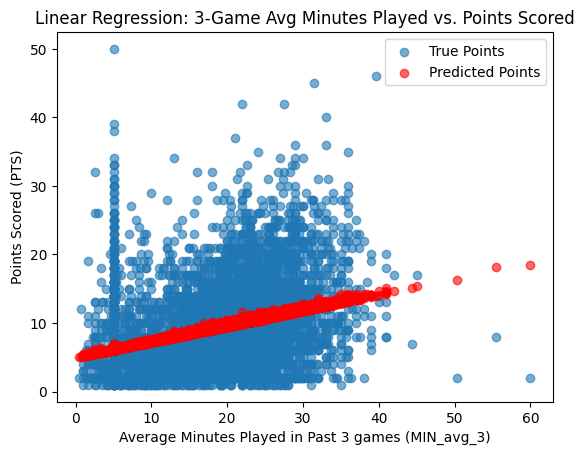

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Filter for valid data
filtered_reg_data = merged_w_noNA[(merged_w_noNA['MIN_avg_3'] > 0) & (merged_w_noNA['PTS'] > 0)]

# Define predictors (X) and target (y)
X_reg = filtered_reg_data[['MIN_avg_3', 'OREB_avg_3']]
y_reg = filtered_reg_data['PTS']

# Train-Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Replace missing values in X_train_reg
X_train_reg = X_train_reg.fillna(0)

# Train the Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_reg, y_train_reg)

# Make Predictions
y_pred_reg = linear_reg_model.predict(X_test_reg)

# Calculate and display Mean Squared Error (MSE)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (Linear Regression): {mse_reg}")

# Evaluate feature importance (coefficients)
coefficients_reg = pd.DataFrame({
    'Predictor': X_reg.columns,
    'Coefficient': linear_reg_model.coef_
})
print(coefficients_reg)

# Visualize the relationship between MIN and PTS
plt.scatter(X_test_reg['MIN_avg_3'], y_test_reg, label='True Points', alpha=0.6)
plt.scatter(X_test_reg['MIN_avg_3'], y_pred_reg, label='Predicted Points', alpha=0.6, color='red')
plt.xlabel('Average Minutes Played in Past 3 games (MIN_avg_3)')
plt.ylabel('Points Scored (PTS)')
plt.title('Linear Regression: 3-Game Avg Minutes Played vs. Points Scored')
plt.legend()
plt.show()


Mean Squared Error (Linear Regression): 23.81254073530923
  Predictor  Coefficient
0       MIN     0.344207
1      OREB     0.315725


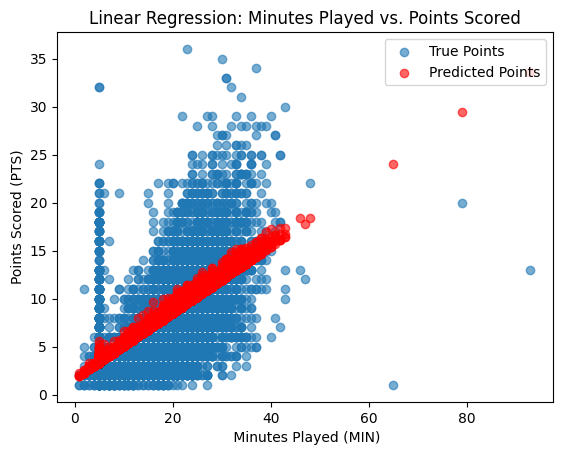

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Filter for valid data
filtered_reg_data = merged_w_noNA[(merged_w_noNA['MIN'] > 0) & (merged_w_noNA['PTS'] > 0)]

# Define predictors (X) and target (y)
X_reg = filtered_reg_data[['MIN', 'OREB']]
y_reg = filtered_reg_data['PTS']

# Train-Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Replace missing values in X_train_reg
X_train_reg = X_train_reg.fillna(0)

# Train the Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_reg, y_train_reg)

# Make Predictions
y_pred_reg = linear_reg_model.predict(X_test_reg)

# Calculate and display Mean Squared Error (MSE)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (Linear Regression): {mse_reg}")

# Evaluate feature importance (coefficients)
coefficients_reg = pd.DataFrame({
    'Predictor': X_reg.columns,
    'Coefficient': linear_reg_model.coef_
})
print(coefficients_reg)

# Visualize the relationship between MIN and PTS
plt.scatter(X_test_reg['MIN'], y_test_reg, label='True Points', alpha=0.6)
plt.scatter(X_test_reg['MIN'], y_pred_reg, label='Predicted Points', alpha=0.6, color='red')
plt.xlabel(' Minutes Played (MIN)')
plt.ylabel('Points Scored (PTS)')
plt.title('Linear Regression: Minutes Played vs. Points Scored')
plt.legend()
plt.show()


In [158]:
#reducing again

In [159]:
# identify how many rows in merged_w_3 have MIN_avg_3 values of 0 or NA values, remove them, and how many rows have PF values of 6 or more, the percentage and the total number of rows

# Count rows with MIN_avg_3 values of 0 or NA in merged_w_3
min_avg_3_zero_na_count = len(merged_w_3[(merged_w_3['MIN_avg_3'] == 0) | (merged_w_3['MIN_avg_3'].isna())])

print(f"Number of rows in merged_w_3 with MIN_avg_3 values of 0 or NA: {min_avg_3_zero_na_count}")

# Remove rows with MIN_avg_3 values of 0 or NA from merged_w_3
merged_w_3_filtered = merged_w_3[(merged_w_3['MIN_avg_3'] != 0) & (merged_w_3['MIN_avg_3'].notna())]

# Calculate stats for PF values of 6 or more in the filtered DataFrame
num_pf_6_or_more = len(merged_w_3_filtered[merged_w_3_filtered['PF'] >= 6])
total_rows = len(merged_w_3_filtered)
percentage_pf_6_or_more = (num_pf_6_or_more / total_rows) * 100

print(f"Number of rows in merged_w_3 with PF values of 6 or more (after filtering): {num_pf_6_or_more}")
print(f"Percentage of rows in merged_w_3 with PF values of 6 or more (after filtering): {percentage_pf_6_or_more:.2f}%")
print(f"Total number of rows in merged_w_3 (after filtering): {total_rows}")

Number of rows in merged_w_3 with MIN_avg_3 values of 0 or NA: 84616
Number of rows in merged_w_3 with PF values of 6 or more (after filtering): 414
Percentage of rows in merged_w_3 with PF values of 6 or more (after filtering): 1.97%
Total number of rows in merged_w_3 (after filtering): 21006


In [160]:
#regression decision tree

Mean Squared Error (MSE): 1.9474947033312668
R-squared: 0.20199249145772458


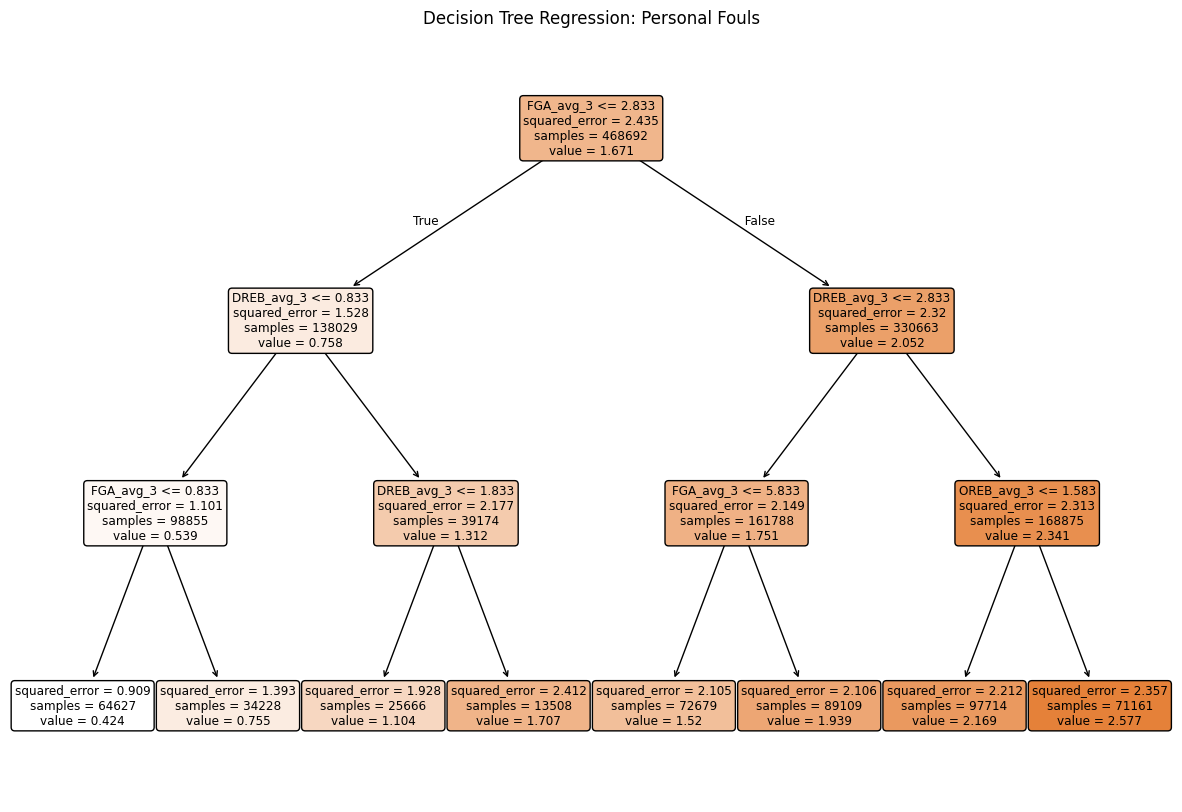

Decision Tree Splitting Rules:
|--- FGA_avg_3 <= 2.83
|   |--- DREB_avg_3 <= 0.83
|   |   |--- FGA_avg_3 <= 0.83
|   |   |   |--- value: [0.42]
|   |   |--- FGA_avg_3 >  0.83
|   |   |   |--- value: [0.75]
|   |--- DREB_avg_3 >  0.83
|   |   |--- DREB_avg_3 <= 1.83
|   |   |   |--- value: [1.10]
|   |   |--- DREB_avg_3 >  1.83
|   |   |   |--- value: [1.71]
|--- FGA_avg_3 >  2.83
|   |--- DREB_avg_3 <= 2.83
|   |   |--- FGA_avg_3 <= 5.83
|   |   |   |--- value: [1.52]
|   |   |--- FGA_avg_3 >  5.83
|   |   |   |--- value: [1.94]
|   |--- DREB_avg_3 >  2.83
|   |   |--- OREB_avg_3 <= 1.58
|   |   |   |--- value: [2.17]
|   |   |--- OREB_avg_3 >  1.58
|   |   |   |--- value: [2.58]

Feature Importances:
             Feature  Importance
1          FGA_avg_3    0.756400
8         DREB_avg_3    0.213564
7         OREB_avg_3    0.030036
0          MIN_avg_3    0.000000
2       FG_PCT_avg_3    0.000000
3         FG3A_avg_3    0.000000
4      FG3_PCT_avg_3    0.000000
5          FTA_avg_3    0

In [161]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Define predictors and target
X_reg = merged_w_noNA[['MIN_avg_3', 'FGA_avg_3', 'FG_PCT_avg_3', 'FG3A_avg_3',
                        'FG3_PCT_avg_3', 'FTA_avg_3', 'FT_PCT_avg_3', 'OREB_avg_3', 'DREB_avg_3',
                        'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3', 'PLUS_MINUS_avg_3']]
y_reg = merged_w_noNA['PF']  # Target: Predicting Personal Fouls

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the model
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse_reg}")
print(f"R-squared: {r2_reg}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X_reg.columns, filled=True, rounded=True)
plt.title("Decision Tree Regression: Personal Fouls")
plt.show()

# Display splitting rules
tree_rules_reg = export_text(regressor, feature_names=list(X_reg.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_reg)

# Extract feature importance
importances_reg = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importances_reg)


Mean Squared Error (MSE): 0.5602297472149462
Root Mean Squared Error (RMSE): 0.7484849679285124
R-squared: 0.4975464709397457


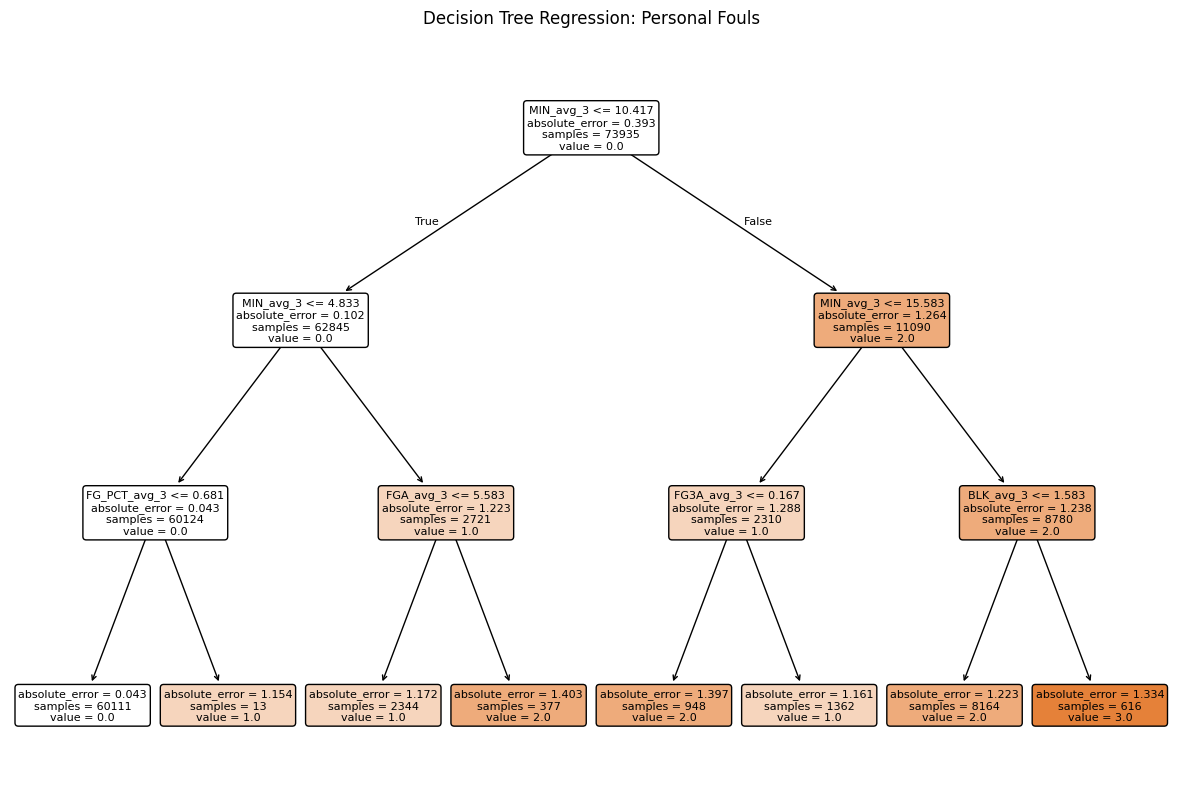

Decision Tree Splitting Rules:
|--- MIN_avg_3 <= 10.42
|   |--- MIN_avg_3 <= 4.83
|   |   |--- FG_PCT_avg_3 <= 0.68
|   |   |   |--- value: [0.00]
|   |   |--- FG_PCT_avg_3 >  0.68
|   |   |   |--- value: [1.00]
|   |--- MIN_avg_3 >  4.83
|   |   |--- FGA_avg_3 <= 5.58
|   |   |   |--- value: [1.00]
|   |   |--- FGA_avg_3 >  5.58
|   |   |   |--- value: [2.00]
|--- MIN_avg_3 >  10.42
|   |--- MIN_avg_3 <= 15.58
|   |   |--- FG3A_avg_3 <= 0.17
|   |   |   |--- value: [2.00]
|   |   |--- FG3A_avg_3 >  0.17
|   |   |   |--- value: [1.00]
|   |--- MIN_avg_3 >  15.58
|   |   |--- BLK_avg_3 <= 1.58
|   |   |   |--- value: [2.00]
|   |   |--- BLK_avg_3 >  1.58
|   |   |   |--- value: [3.00]

Feature Importances:
             Feature  Importance
0          MIN_avg_3    0.980019
3         FG3A_avg_3    0.007361
11         BLK_avg_3    0.006730
1          FGA_avg_3    0.005574
2       FG_PCT_avg_3    0.000315
4      FG3_PCT_avg_3    0.000000
5          FTA_avg_3    0.000000
6       FT_PCT_avg_3 

In [162]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd



# Define predictors and target
X_reg = merged_w_3[['MIN_avg_3', 'FGA_avg_3', 'FG_PCT_avg_3', 'FG3A_avg_3',
                        'FG3_PCT_avg_3', 'FTA_avg_3', 'FT_PCT_avg_3', 'OREB_avg_3', 'DREB_avg_3',
                        'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3', 'PLUS_MINUS_avg_3']]
y_reg = merged_w_3['PF']  # Target: Predicting Personal Fouls

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(criterion='absolute_error',
    min_samples_split=10,      # Minimum samples to split
    min_samples_leaf=5,
    max_depth=3, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the model
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)

rmse_reg = mse_reg ** 0.5  # Calculate RMSE

r2_reg = r2_score(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse_reg}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg}")

print(f"R-squared: {r2_reg}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X_reg.columns, filled=True, rounded=True)
plt.title("Decision Tree Regression: Personal Fouls")
plt.show()

# Display splitting rules
tree_rules_reg = export_text(regressor, feature_names=list(X_reg.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_reg)

# Extract feature importance
importances_reg = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importances_reg)


Mean Squared Error (MSE): 0.5357262566577485
Root Mean Squared Error (RMSE): 0.7319332323769352
R-squared: 0.519522928573358


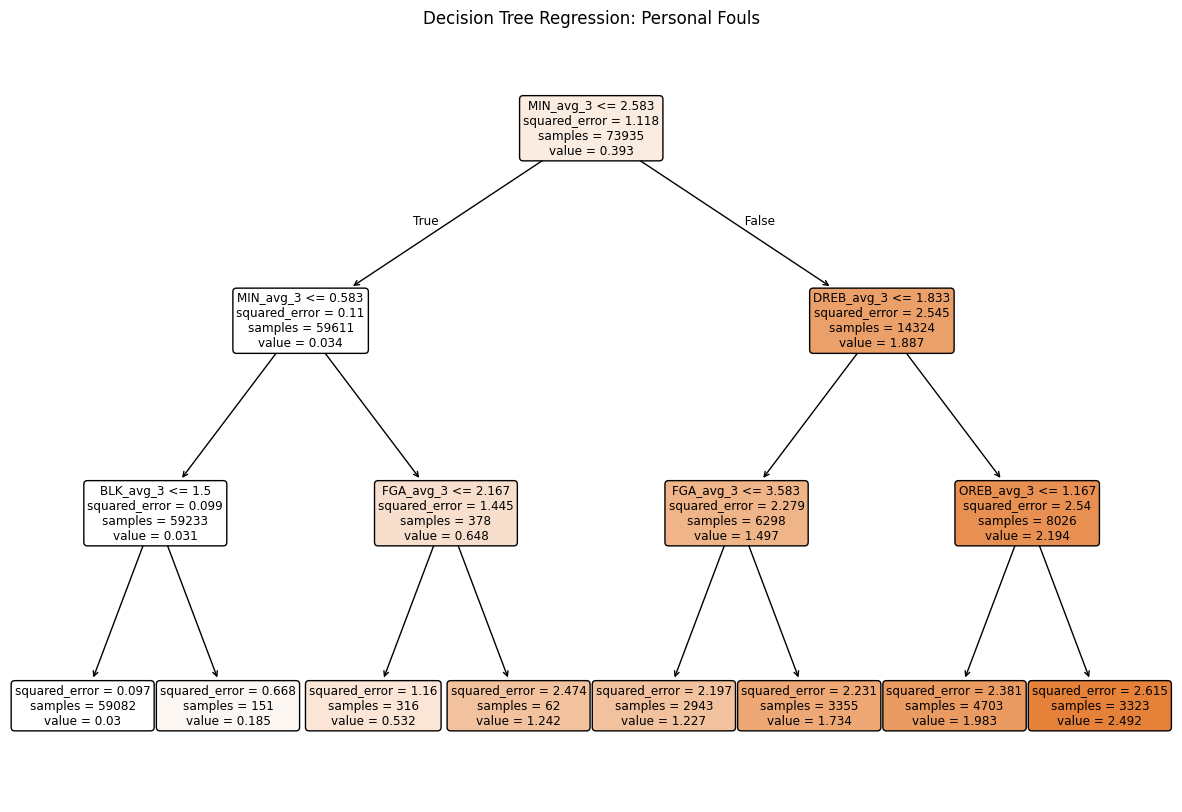

Decision Tree Splitting Rules:
|--- MIN_avg_3 <= 2.58
|   |--- MIN_avg_3 <= 0.58
|   |   |--- BLK_avg_3 <= 1.50
|   |   |   |--- value: [0.03]
|   |   |--- BLK_avg_3 >  1.50
|   |   |   |--- value: [0.19]
|   |--- MIN_avg_3 >  0.58
|   |   |--- FGA_avg_3 <= 2.17
|   |   |   |--- value: [0.53]
|   |   |--- FGA_avg_3 >  2.17
|   |   |   |--- value: [1.24]
|--- MIN_avg_3 >  2.58
|   |--- DREB_avg_3 <= 1.83
|   |   |--- FGA_avg_3 <= 3.58
|   |   |   |--- value: [1.23]
|   |   |--- FGA_avg_3 >  3.58
|   |   |   |--- value: [1.73]
|   |--- DREB_avg_3 >  1.83
|   |   |--- OREB_avg_3 <= 1.17
|   |   |   |--- value: [1.98]
|   |   |--- OREB_avg_3 >  1.17
|   |   |   |--- value: [2.49]

Feature Importances:
             Feature  Importance
0          MIN_avg_3    0.937605
8         DREB_avg_3    0.040364
7         OREB_avg_3    0.011864
1          FGA_avg_3    0.010082
11         BLK_avg_3    0.000086
2       FG_PCT_avg_3    0.000000
3         FG3A_avg_3    0.000000
4      FG3_PCT_avg_3    0.000

In [163]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

#SAME AS REGULAR MERGED W 3, NO CHANGES TO REGRESSOR LINE

# Define predictors and target
X_reg = merged_w_3[['MIN_avg_3', 'FGA_avg_3', 'FG_PCT_avg_3', 'FG3A_avg_3',
                        'FG3_PCT_avg_3', 'FTA_avg_3', 'FT_PCT_avg_3', 'OREB_avg_3', 'DREB_avg_3',
                        'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3', 'PLUS_MINUS_avg_3']]
y_reg = merged_w_3['PF']  # Target: Predicting Personal Fouls

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the model
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)

rmse_reg = mse_reg ** 0.5  # Calculate RMSE

r2_reg = r2_score(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse_reg}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg}")

print(f"R-squared: {r2_reg}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X_reg.columns, filled=True, rounded=True)
plt.title("Decision Tree Regression: Personal Fouls")
plt.show()

# Display splitting rules
tree_rules_reg = export_text(regressor, feature_names=list(X_reg.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_reg)

# Extract feature importance
importances_reg = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importances_reg)


In [164]:
# determine how many rows in merged_w_noNA have PF values of 6 or more, the percentage and the total number of rows

# Calculate the number of rows with PF values of 6 or more
num_pf_6_or_more = len(merged_w_noNA[merged_w_noNA['PF'] >= 6])

# Calculate the total number of rows
total_rows = len(merged_w_noNA)

# Calculate the percentage
percentage_pf_6_or_more = (num_pf_6_or_more / total_rows) * 100

# Print the results
print(f"Number of rows with PF values of 6 or more: {num_pf_6_or_more}")
print(f"Percentage of rows with PF values of 6 or more: {percentage_pf_6_or_more:.2f}%")
print(f"Total number of rows: {total_rows}")

Number of rows with PF values of 6 or more: 7492
Percentage of rows with PF values of 6 or more: 1.12%
Total number of rows: 669560


In [165]:
# determine how many rows in merged_w_3 have PF values of 6 or more, and the percentage and the total number of rows

# Calculate the number of rows with PF values of 6 or more
num_pf_6_or_more = len(merged_w_3[merged_w_3['PF'] >= 6])

# Calculate the total number of rows
total_rows = len(merged_w_3)

# Calculate the percentage
percentage_pf_6_or_more = (num_pf_6_or_more / total_rows) * 100

# Print the results
print(f"Number of rows with PF values of 6 or more: {num_pf_6_or_more}")
print(f"Percentage of rows with PF values of 6 or more: {percentage_pf_6_or_more:.2f}%")
print(f"Total number of rows: {total_rows}")

Number of rows with PF values of 6 or more: 446
Percentage of rows with PF values of 6 or more: 0.42%
Total number of rows: 105622


In [166]:
#merged_w_3 will be used from now on

In [167]:
#classification decision trees

Accuracy on Test Data: 0.80


<ipython-input-168-31cb978e9843>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)


Precision (Test Data): 0.02
Recall (Test Data): 0.94
F1 Score (Test Data): 0.04


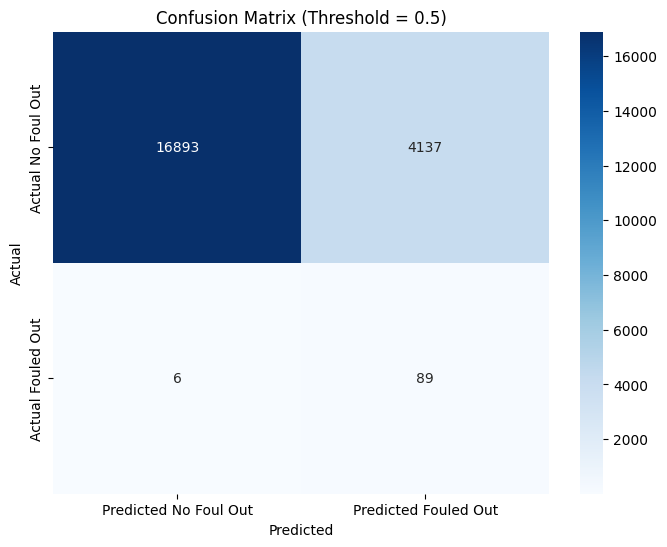

Decision Tree Splitting Rules:
|--- MIN_avg_3 <= 1.58
|   |--- STL_avg_3 <= 1.58
|   |   |--- AST_avg_3 <= 0.42
|   |   |   |--- class: 0
|   |   |--- AST_avg_3 >  0.42
|   |   |   |--- class: 0
|   |--- STL_avg_3 >  1.58
|   |   |--- PTS_avg_3 <= 2.50
|   |   |   |--- class: 1
|   |   |--- PTS_avg_3 >  2.50
|   |   |   |--- class: 0
|--- MIN_avg_3 >  1.58
|   |--- REB_avg_3 <= 2.17
|   |   |--- PTS_avg_3 <= 4.17
|   |   |   |--- class: 1
|   |   |--- PTS_avg_3 >  4.17
|   |   |   |--- class: 1
|   |--- REB_avg_3 >  2.17
|   |   |--- BLK_avg_3 <= 0.83
|   |   |   |--- class: 1
|   |   |--- BLK_avg_3 >  0.83
|   |   |   |--- class: 1

Feature Importances:
      Feature  Importance
0   MIN_avg_3    0.957266
3   REB_avg_3    0.022009
2   PTS_avg_3    0.009743
6   BLK_avg_3    0.005217
5   STL_avg_3    0.003806
4   AST_avg_3    0.001959
1  OREB_avg_3    0.000000
7    TO_avg_3    0.000000

Threshold | Precision | Recall | F1 Score
0.01       | 0.00     | 1.00  | 0.01
0.10       | 0.02     |

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#merged df, add decision tree and "balanced"

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)

# Define predictors and target
X_cl_bal = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                          'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl_bal = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl_bal, X_test_cl_bal, y_train_cl_bal, y_test_cl_bal = train_test_split(
    X_cl_bal, y_cl_bal, test_size=0.2, random_state=42)

# Train decision tree classifier
tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced')
tree_cl_bal.fit(X_train_cl_bal, y_train_cl_bal)

# Evaluate model on test data
accuracy_cl_bal = tree_cl_bal.score(X_test_cl_bal, y_test_cl_bal)
print(f"Accuracy on Test Data: {accuracy_cl_bal:.2f}")

# Predict on test data
y_pred_probs_cl_bal = tree_cl_bal.predict_proba(X_test_cl_bal)[:, 1]  # Get probabilities for the positive class

# Adjust the classification threshold
threshold = 0.5  # Default threshold
y_pred_cl_bal = (y_pred_probs_cl_bal >= threshold).astype(int)

# Calculate precision, recall, and F1 score
precision_cl_bal = precision_score(y_test_cl_bal, y_pred_cl_bal)
recall_cl_bal = recall_score(y_test_cl_bal, y_pred_cl_bal)
f1_cl_bal = f1_score(y_test_cl_bal, y_pred_cl_bal)

print(f"Precision (Test Data): {precision_cl_bal:.2f}")
print(f"Recall (Test Data): {recall_cl_bal:.2f}")
print(f"F1 Score (Test Data): {f1_cl_bal:.2f}")

# Confusion matrix
cm_cl_bal = confusion_matrix(y_test_cl_bal, y_pred_cl_bal)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cl_bal, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

# Display decision tree rules
tree_rules_cl_bal = export_text(tree_cl_bal, feature_names=list(X_cl_bal.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_cl_bal)

# Extract feature importance
feature_importances_cl_bal = pd.DataFrame({
    'Feature': X_cl_bal.columns,
    'Importance': tree_cl_bal.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_cl_bal)

# Experiment with thresholds
thresholds = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
print("\nThreshold | Precision | Recall | F1 Score")
for t in thresholds:
    y_pred_adj = (y_pred_probs_cl_bal >= t).astype(int)
    precision = precision_score(y_test_cl_bal, y_pred_adj)
    recall = recall_score(y_test_cl_bal, y_pred_adj)
    f1 = f1_score(y_test_cl_bal, y_pred_adj)
    print(f"{t:.2f}       | {precision:.2f}     | {recall:.2f}  | {f1:.2f}")



Threshold | Accuracy | Precision | Recall | F1 Score
0.01       | 0.01     | 0.00     | 1.00  | 0.01


<ipython-input-169-bc6bd8ee41c8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)


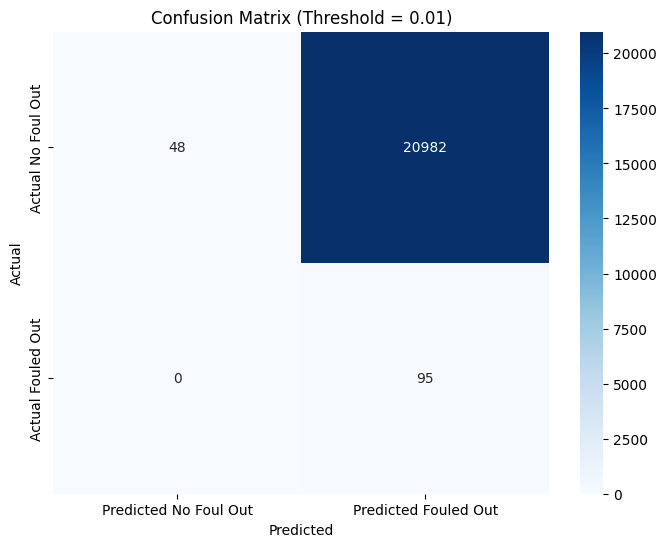

0.10       | 0.80     | 0.02     | 0.94  | 0.04


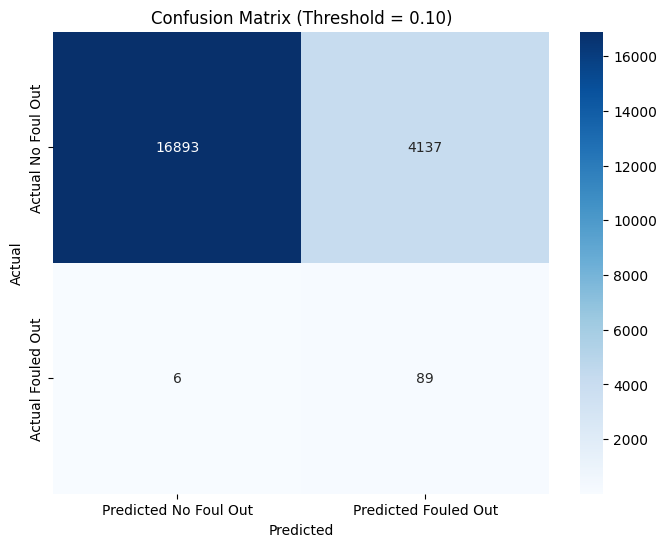

0.30       | 0.80     | 0.02     | 0.94  | 0.04


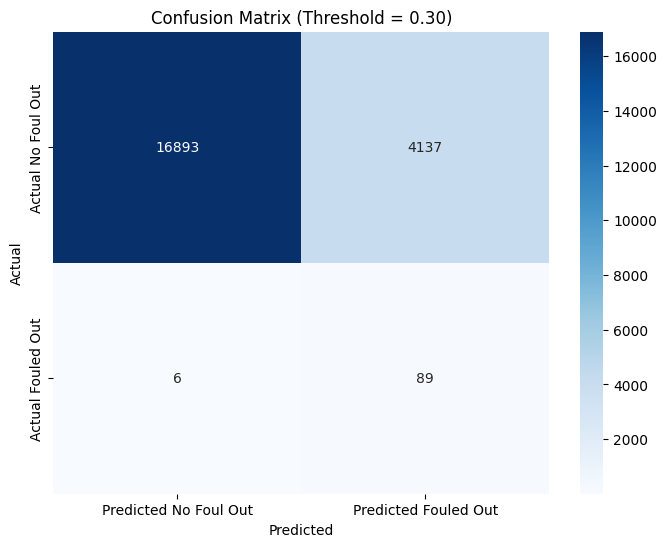

0.50       | 0.80     | 0.02     | 0.94  | 0.04


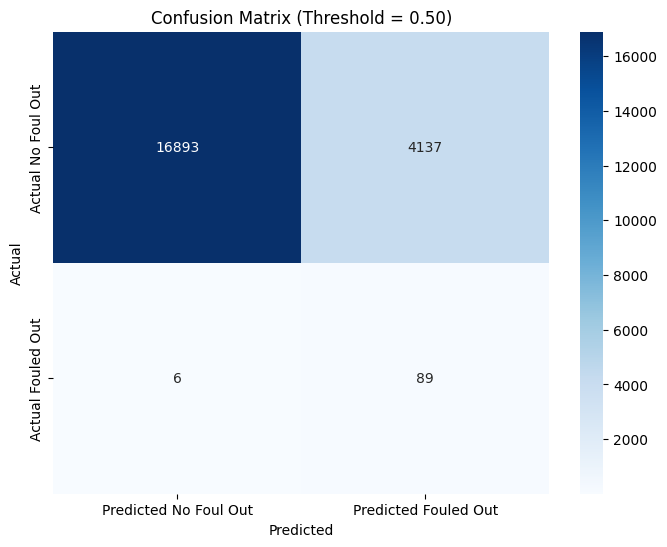

0.70       | 0.85     | 0.02     | 0.84  | 0.05


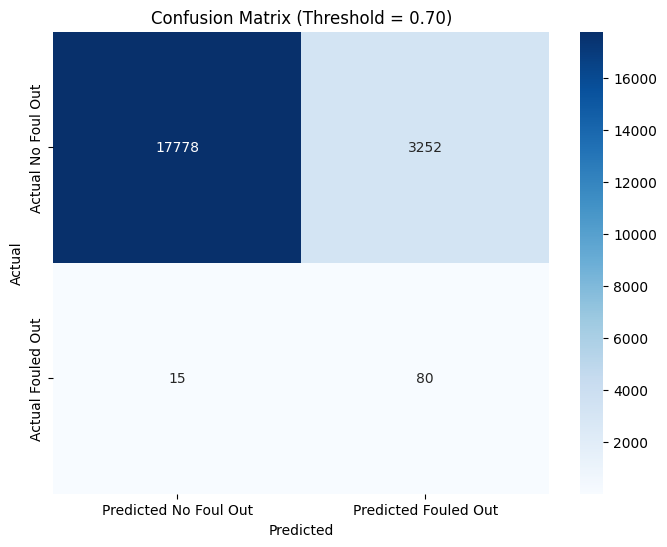

0.71       | 0.85     | 0.02     | 0.84  | 0.05


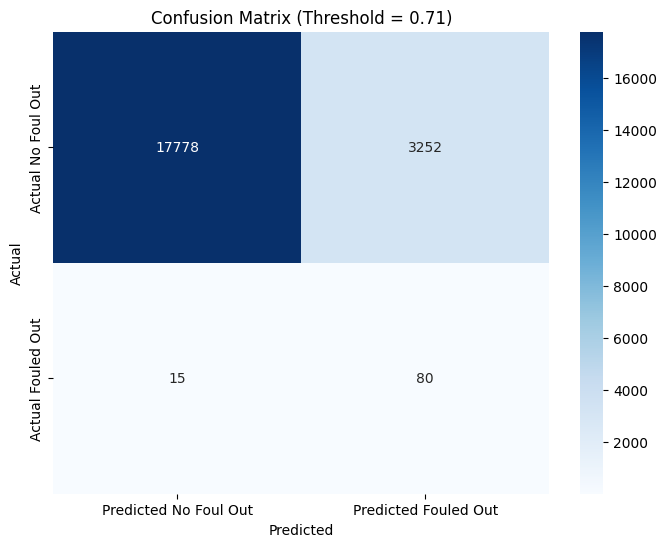

0.90       | 0.97     | 0.04     | 0.25  | 0.08


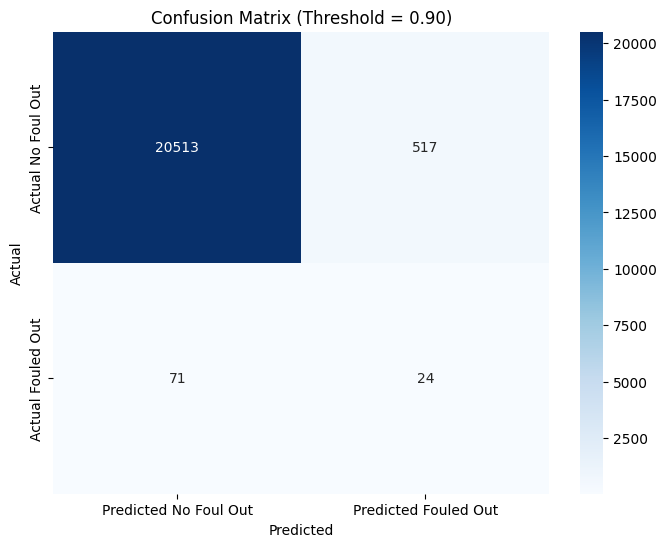

0.99       | 1.00     | 0.00     | 0.00  | 0.00


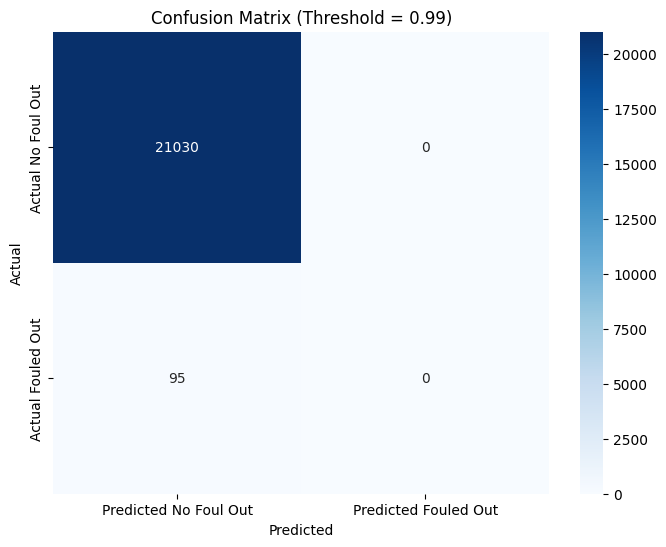

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# add multiple confusion matrices for multiple classification threshholds

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)

# Define predictors and target
X_cl_bal = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                          'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl_bal = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl_bal, X_test_cl_bal, y_train_cl_bal, y_test_cl_bal = train_test_split(
    X_cl_bal, y_cl_bal, test_size=0.2, random_state=42)

# Train decision tree classifier
tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced')
tree_cl_bal.fit(X_train_cl_bal, y_train_cl_bal)

# Predict probabilities on test data
y_pred_probs_cl_bal = tree_cl_bal.predict_proba(X_test_cl_bal)[:, 1]  # Probabilities for the positive class

# Experiment with thresholds
thresholds = [0.01, 0.1, 0.3, 0.5, 0.7, 0.71, 0.9, 0.99]
print("\nThreshold | Accuracy | Precision | Recall | F1 Score")
for t in thresholds:
    # Adjust predictions based on the current threshold
    y_pred_adj = (y_pred_probs_cl_bal >= t).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test_cl_bal, y_pred_adj)
    precision = precision_score(y_test_cl_bal, y_pred_adj, zero_division=0)
    recall = recall_score(y_test_cl_bal, y_pred_adj, zero_division=0)
    f1 = f1_score(y_test_cl_bal, y_pred_adj, zero_division=0)

    # Display metrics
    print(f"{t:.2f}       | {accuracy:.2f}     | {precision:.2f}     | {recall:.2f}  | {f1:.2f}")

    # Confusion matrix for the current threshold
    cm_adj = confusion_matrix(y_test_cl_bal, y_pred_adj)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_adj, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
                yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Threshold = {t:.2f})')
    plt.show()


<ipython-input-196-eba253ff1625>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)


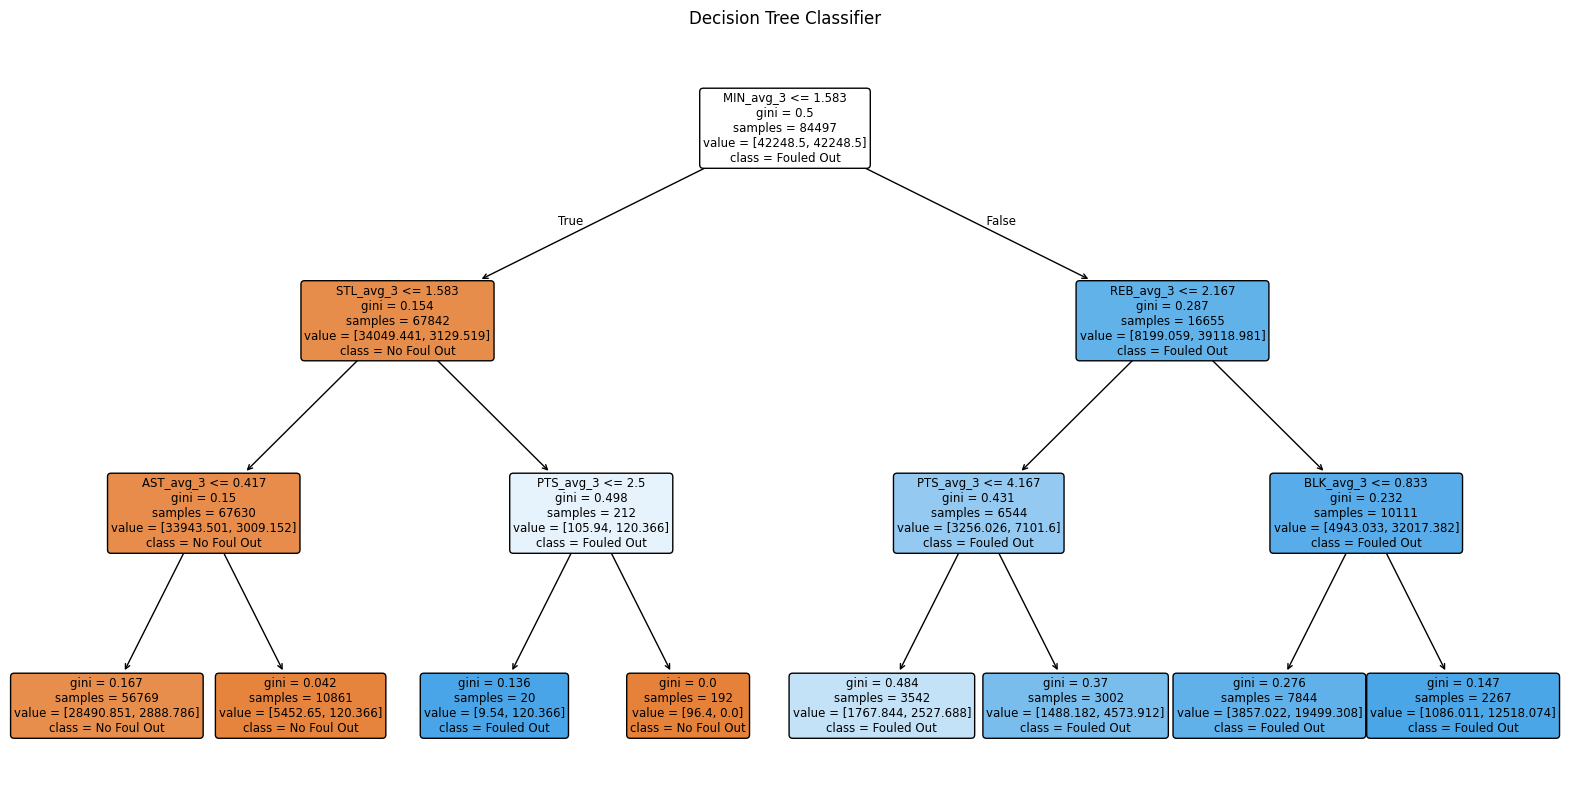

Decision Tree Splitting Rules:
|--- MIN_avg_3 <= 1.58
|   |--- STL_avg_3 <= 1.58
|   |   |--- AST_avg_3 <= 0.42
|   |   |   |--- class: 0
|   |   |--- AST_avg_3 >  0.42
|   |   |   |--- class: 0
|   |--- STL_avg_3 >  1.58
|   |   |--- PTS_avg_3 <= 2.50
|   |   |   |--- class: 1
|   |   |--- PTS_avg_3 >  2.50
|   |   |   |--- class: 0
|--- MIN_avg_3 >  1.58
|   |--- REB_avg_3 <= 2.17
|   |   |--- PTS_avg_3 <= 4.17
|   |   |   |--- class: 1
|   |   |--- PTS_avg_3 >  4.17
|   |   |   |--- class: 1
|   |--- REB_avg_3 >  2.17
|   |   |--- BLK_avg_3 <= 0.83
|   |   |   |--- class: 1
|   |   |--- BLK_avg_3 >  0.83
|   |   |   |--- class: 1



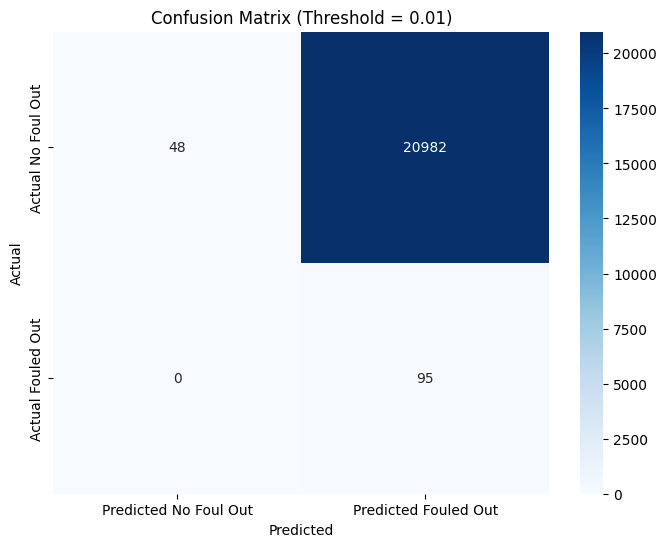

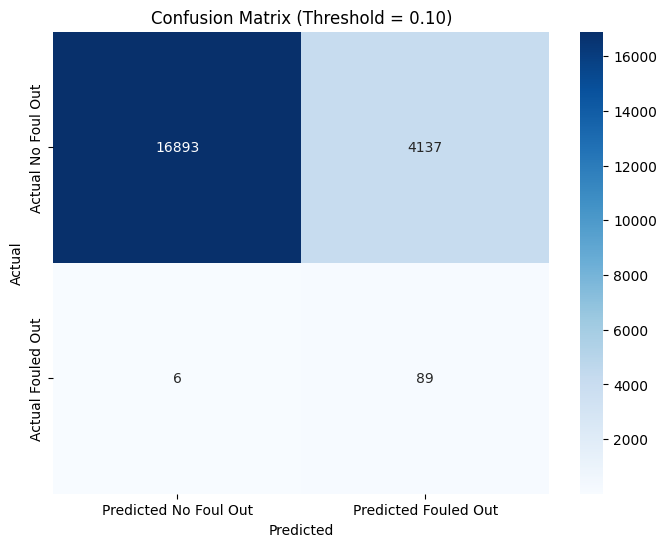

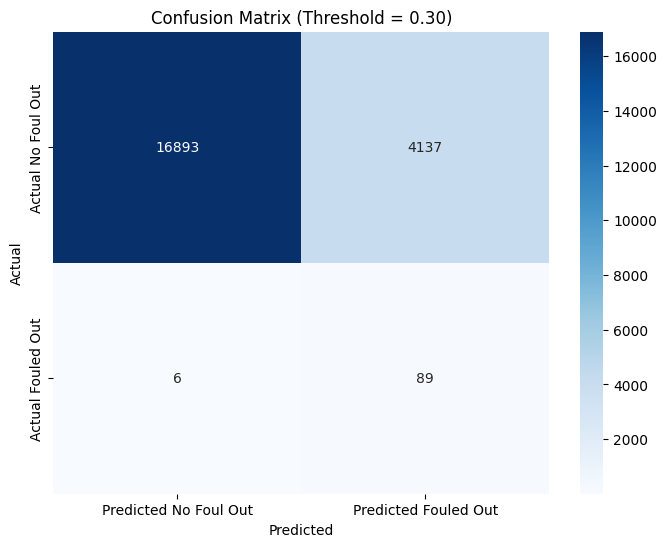

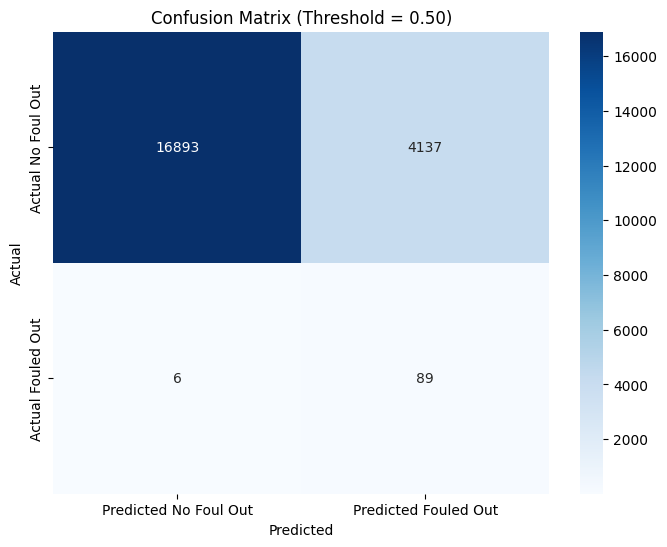

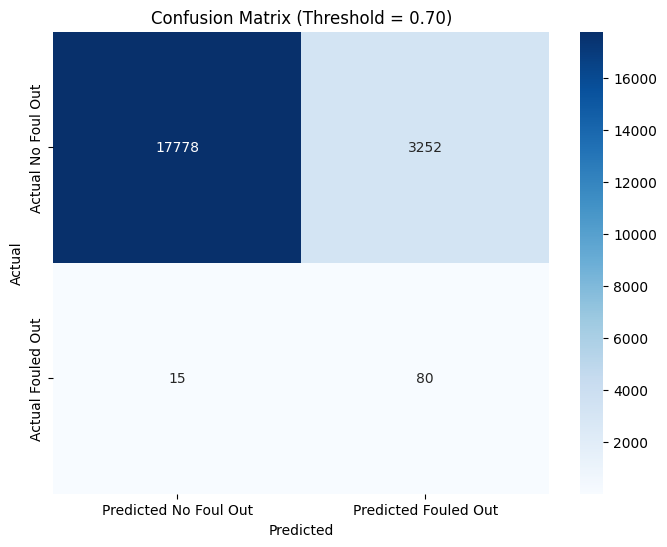

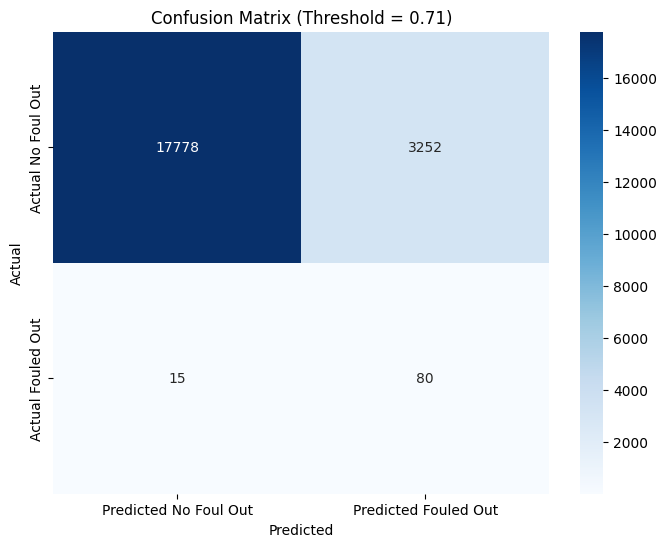

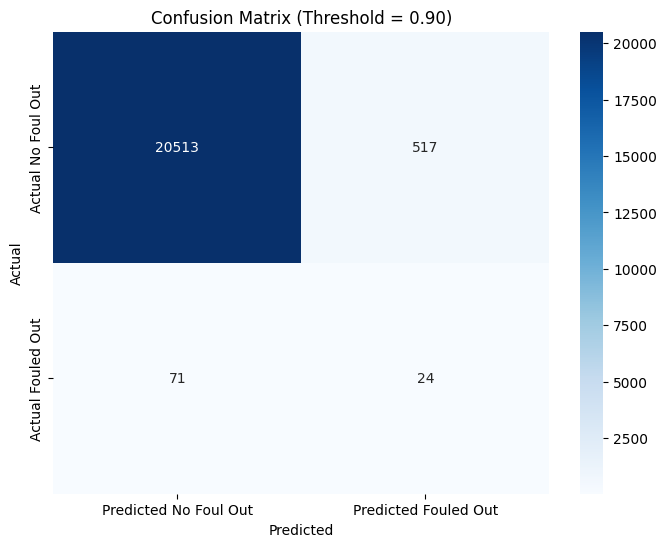

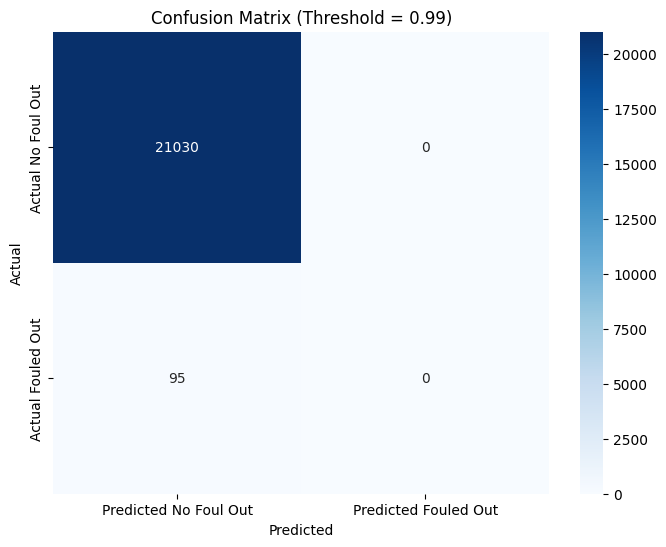

   Threshold  Accuracy  Precision    Recall  F1 Score
0       0.01  0.006769   0.004507  1.000000  0.008974
1       0.10  0.803882   0.021060  0.936842  0.041194
2       0.30  0.803882   0.021060  0.936842  0.041194
3       0.50  0.803882   0.021060  0.936842  0.041194
4       0.70  0.845349   0.024010  0.842105  0.046688
5       0.71  0.845349   0.024010  0.842105  0.046688
6       0.90  0.972166   0.044362  0.252632  0.075472
7       0.99  0.995503   0.000000  0.000000  0.000000


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)

# Define predictors and target
X_cl_bal = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                          'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl_bal = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl_bal, X_test_cl_bal, y_train_cl_bal, y_test_cl_bal = train_test_split(
    X_cl_bal, y_cl_bal, test_size=0.2, random_state=42)

# Train decision tree classifier
tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced')
tree_cl_bal.fit(X_train_cl_bal, y_train_cl_bal)

# Print decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_cl_bal, feature_names=X_cl_bal.columns, class_names=['No Foul Out', 'Fouled Out'], filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

# Export decision tree text rules
tree_rules_cl_bal = export_text(tree_cl_bal, feature_names=list(X_cl_bal.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_cl_bal)

# Predict probabilities on test data
y_pred_probs_cl_bal = tree_cl_bal.predict_proba(X_test_cl_bal)[:, 1]  # Probabilities for the positive class

# Experiment with thresholds
thresholds = [0.01, 0.1, 0.3, 0.5, 0.7, 0.71, 0.9, 0.99]
results = []

for t in thresholds:
    # Adjust predictions based on the current threshold
    y_pred_adj = (y_pred_probs_cl_bal >= t).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test_cl_bal, y_pred_adj)
    precision = precision_score(y_test_cl_bal, y_pred_adj, zero_division=0)
    recall = recall_score(y_test_cl_bal, y_pred_adj, zero_division=0)
    f1 = f1_score(y_test_cl_bal, y_pred_adj, zero_division=0)

    # Store results
    results.append({'Threshold': t, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

    # Confusion matrix for the current threshold
    cm_adj = confusion_matrix(y_test_cl_bal, y_pred_adj)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_adj, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
                yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Threshold = {t:.2f})')
    plt.show()

# Display results in a DataFrame
results_df = pd.DataFrame(results)
results_df.columns = ['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Print the results
print(results_df)


<ipython-input-170-ab2ab2cc24e1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)


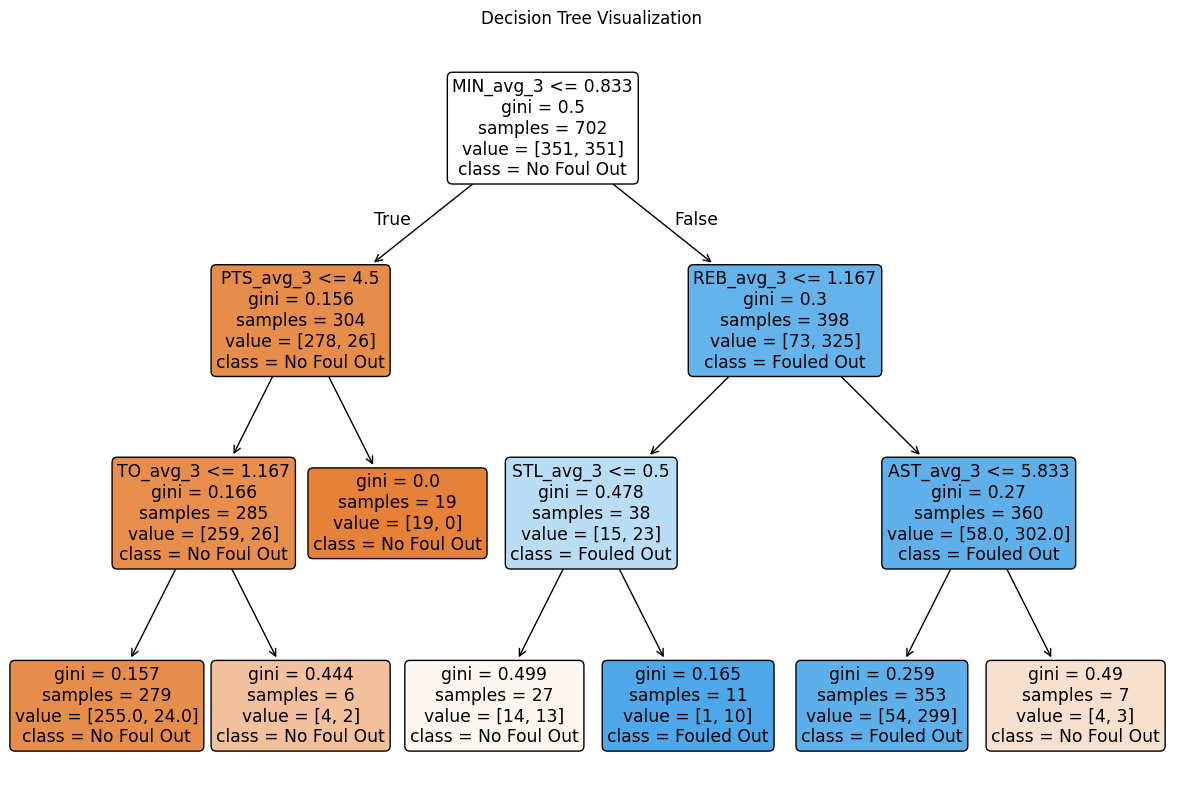

Accuracy (Test Data): 0.83
Precision (Test Data): 0.02
Recall (Test Data): 0.85
F1 Score (Test Data): 0.04


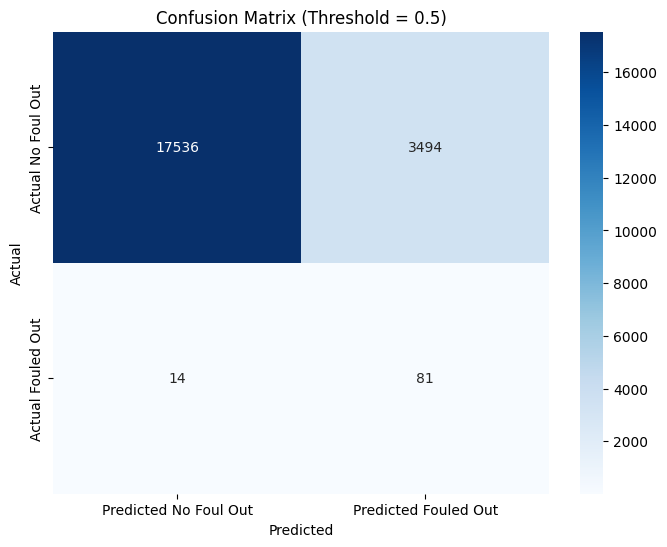

Decision Tree Splitting Rules:
|--- MIN_avg_3 <= 0.83
|   |--- PTS_avg_3 <= 4.50
|   |   |--- TO_avg_3 <= 1.17
|   |   |   |--- class: 0
|   |   |--- TO_avg_3 >  1.17
|   |   |   |--- class: 0
|   |--- PTS_avg_3 >  4.50
|   |   |--- class: 0
|--- MIN_avg_3 >  0.83
|   |--- REB_avg_3 <= 1.17
|   |   |--- STL_avg_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- STL_avg_3 >  0.50
|   |   |   |--- class: 1
|   |--- REB_avg_3 >  1.17
|   |   |--- AST_avg_3 <= 5.83
|   |   |   |--- class: 1
|   |   |--- AST_avg_3 >  5.83
|   |   |   |--- class: 0

Feature Importances:
      Feature  Importance
0   MIN_avg_3    0.948371
3   REB_avg_3    0.019315
5   STL_avg_3    0.014714
4   AST_avg_3    0.012374
7    TO_avg_3    0.003699
2   PTS_avg_3    0.001526
1  OREB_avg_3    0.000000
6   BLK_avg_3    0.000000

Threshold | Accuracy | Precision | Recall | F1 Score
0.01       | 0.06     | 0.00     | 0.99  | 0.01
0.10       | 0.79     | 0.02     | 0.95  | 0.04
0.30       | 0.79     | 0.02     | 0.95  | 0.04

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#add random undersampling and hyperparameters

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)

# Define predictors and target
X_cl = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                      'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(
    X_cl, y_cl, test_size=0.2, random_state=42)

# Apply Random Undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_cl, y_train_cl)

# Train decision tree classifier with hyperparameter adjustments
tree_cl_undersampled = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,               # Limit tree depth to control overfitting
    min_samples_split=10,      # Require at least 10 samples to split a node
    min_samples_leaf=5,        # Require at least 5 samples in a leaf
    ccp_alpha=0.000,            # Cost-complexity pruning to simplify the tree
    class_weight=None          # Not needed due to undersampling
)
tree_cl_undersampled.fit(X_train_undersampled, y_train_undersampled)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(15, 10))  # Adjust size for better readability
plot_tree(
    tree_cl_undersampled,
    feature_names=X_cl.columns,
    class_names=['No Foul Out', 'Fouled Out'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

# Evaluate model on test data
y_pred_probs_undersampled = tree_cl_undersampled.predict_proba(X_test_cl)[:, 1]  # Get probabilities for the positive class

# Adjust the classification threshold
threshold = 0.5  # Default threshold
y_pred_undersampled = (y_pred_probs_undersampled >= threshold).astype(int)

# Calculate metrics
accuracy_undersampled = accuracy_score(y_test_cl, y_pred_undersampled)
precision_undersampled = precision_score(y_test_cl, y_pred_undersampled, zero_division=0)
recall_undersampled = recall_score(y_test_cl, y_pred_undersampled, zero_division=0)
f1_undersampled = f1_score(y_test_cl, y_pred_undersampled, zero_division=0)

print(f"Accuracy (Test Data): {accuracy_undersampled:.2f}")
print(f"Precision (Test Data): {precision_undersampled:.2f}")
print(f"Recall (Test Data): {recall_undersampled:.2f}")
print(f"F1 Score (Test Data): {f1_undersampled:.2f}")

# Confusion matrix
cm_undersampled = confusion_matrix(y_test_cl, y_pred_undersampled)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_undersampled, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

# Display decision tree rules
tree_rules_undersampled = export_text(tree_cl_undersampled, feature_names=list(X_cl.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_undersampled)

# Extract feature importance
feature_importances_undersampled = pd.DataFrame({
    'Feature': X_cl.columns,
    'Importance': tree_cl_undersampled.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_undersampled)

# Experiment with thresholds
thresholds = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
print("\nThreshold | Accuracy | Precision | Recall | F1 Score")
for t in thresholds:
    y_pred_adj = (y_pred_probs_undersampled >= t).astype(int)
    accuracy = accuracy_score(y_test_cl, y_pred_adj)
    precision = precision_score(y_test_cl, y_pred_adj, zero_division=0)
    recall = recall_score(y_test_cl, y_pred_adj, zero_division=0)
    f1 = f1_score(y_test_cl, y_pred_adj, zero_division=0)
    print(f"{t:.2f}       | {accuracy:.2f}     | {precision:.2f}     | {recall:.2f}  | {f1:.2f}")


In [171]:
#not edited yet

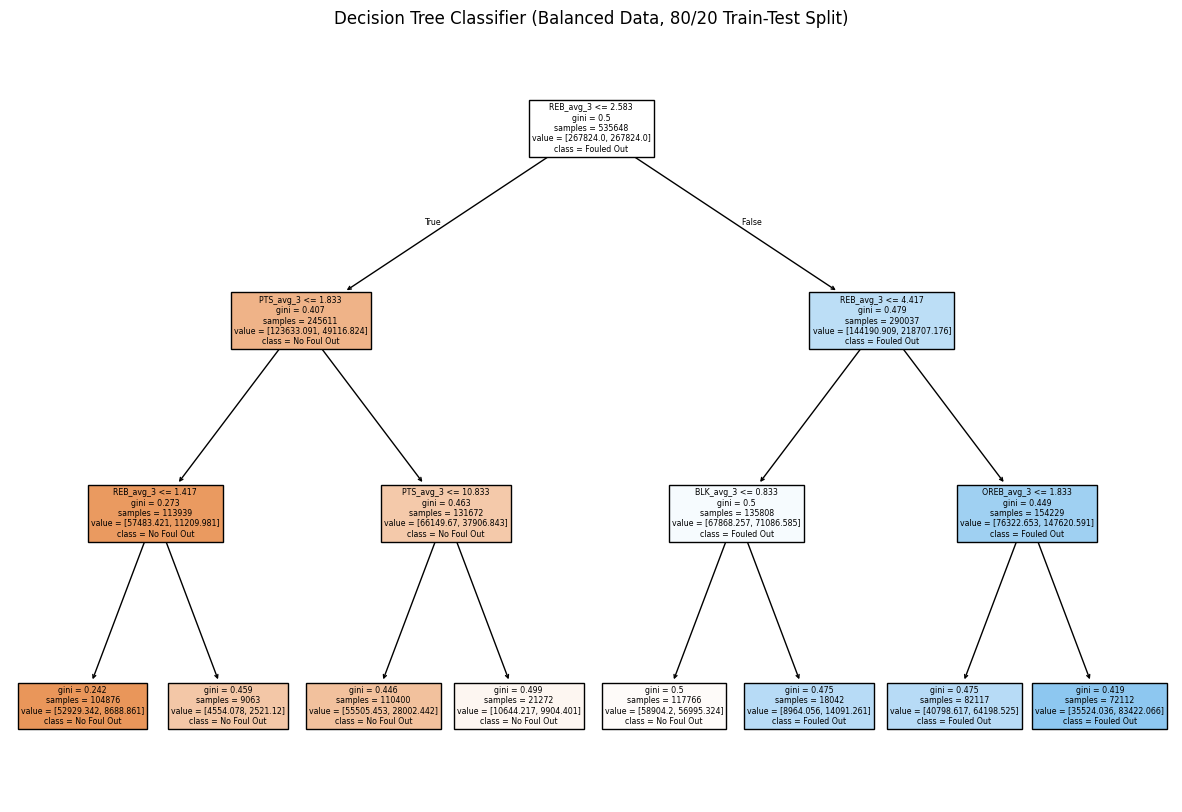

Accuracy on Test Data: 0.68
F1 Score (Test Data): 0.04


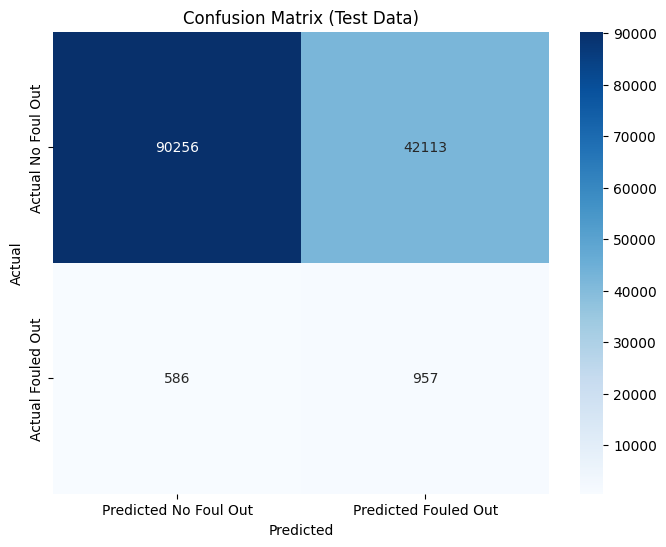

Decision Tree Splitting Rules:
|--- REB_avg_3 <= 2.58
|   |--- PTS_avg_3 <= 1.83
|   |   |--- REB_avg_3 <= 1.42
|   |   |   |--- class: 0
|   |   |--- REB_avg_3 >  1.42
|   |   |   |--- class: 0
|   |--- PTS_avg_3 >  1.83
|   |   |--- PTS_avg_3 <= 10.83
|   |   |   |--- class: 0
|   |   |--- PTS_avg_3 >  10.83
|   |   |   |--- class: 0
|--- REB_avg_3 >  2.58
|   |--- REB_avg_3 <= 4.42
|   |   |--- BLK_avg_3 <= 0.83
|   |   |   |--- class: 0
|   |   |--- BLK_avg_3 >  0.83
|   |   |   |--- class: 1
|   |--- REB_avg_3 >  4.42
|   |   |--- OREB_avg_3 <= 1.83
|   |   |   |--- class: 1
|   |   |--- OREB_avg_3 >  1.83
|   |   |   |--- class: 1

Feature Importances:
      Feature  Importance
3   REB_avg_3    0.835887
2   PTS_avg_3    0.120891
1  OREB_avg_3    0.026873
6   BLK_avg_3    0.016349
0   MIN_avg_3    0.000000
4   AST_avg_3    0.000000
5   STL_avg_3    0.000000
7    TO_avg_3    0.000000


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#MERGED WITH NA'S WITH BALANCE


# Define predictors and target

# Create binary target for fouling out
merged_w_noNA['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)
X_cl_bal = merged_w_noNA[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                       'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl_bal = merged_w_noNA['Fouled_Out']

# Create binary target for fouling out
# merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)
# X_cl_bal = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
#                        'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
# y_cl_bal = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl_bal, X_test_cl_bal, y_train_cl_bal, y_test_cl_bal = train_test_split(
    X_cl_bal, y_cl_bal, test_size=0.2, random_state=42)

# Train decision tree classifier
tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight = 'balanced')
#tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_cl_bal.fit(X_train_cl_bal, y_train_cl_bal)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_cl_bal, feature_names=X_cl_bal.columns, class_names=['No Foul Out', 'Fouled Out'], filled=True)
plt.title("Decision Tree Classifier (Balanced Data, 80/20 Train-Test Split)")
plt.show()

# Evaluate model on test data
accuracy_cl_bal = tree_cl_bal.score(X_test_cl_bal, y_test_cl_bal)
print(f"Accuracy on Test Data: {accuracy_cl_bal:.2f}")

# Predict on test data
y_pred_cl_bal = tree_cl_bal.predict(X_test_cl_bal)

# Calculate F1 score
f1_cl_bal = f1_score(y_test_cl_bal, y_pred_cl_bal)
print(f"F1 Score (Test Data): {f1_cl_bal:.2f}")

# Confusion matrix
cm_cl_bal = confusion_matrix(y_test_cl_bal, y_pred_cl_bal)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cl_bal, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Display decision tree rules
tree_rules_cl_bal = export_text(tree_cl_bal, feature_names=list(X_cl_bal.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_cl_bal)

# Extract feature importance
feature_importances_cl_bal = pd.DataFrame({
    'Feature': X_cl_bal.columns,
    'Importance': tree_cl_bal.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_cl_bal)


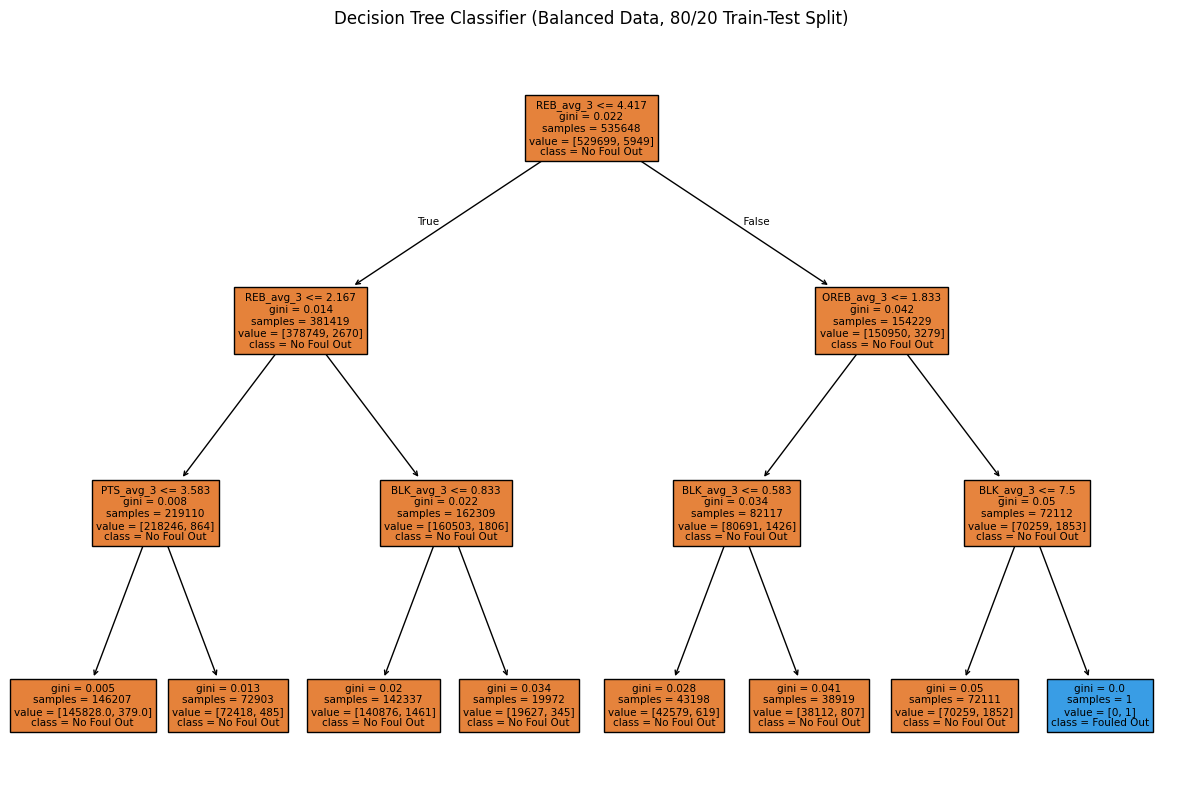

Accuracy on Test Data: 0.99
F1 Score (Test Data): 0.00


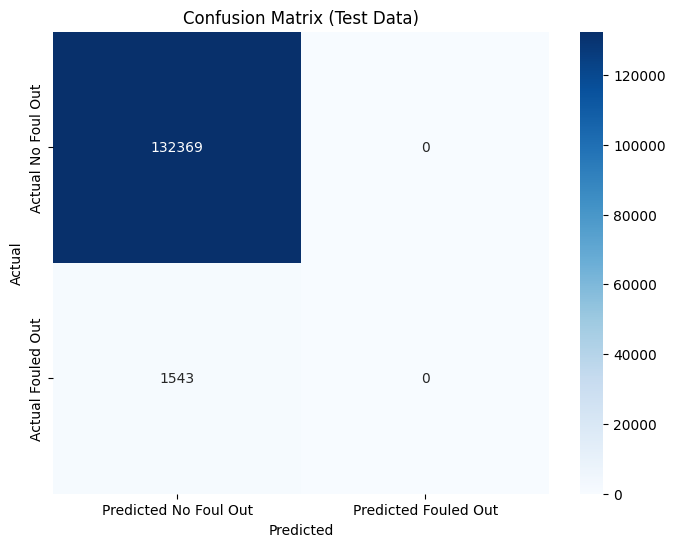

Decision Tree Splitting Rules:
|--- REB_avg_3 <= 4.42
|   |--- REB_avg_3 <= 2.17
|   |   |--- PTS_avg_3 <= 3.58
|   |   |   |--- class: 0
|   |   |--- PTS_avg_3 >  3.58
|   |   |   |--- class: 0
|   |--- REB_avg_3 >  2.17
|   |   |--- BLK_avg_3 <= 0.83
|   |   |   |--- class: 0
|   |   |--- BLK_avg_3 >  0.83
|   |   |   |--- class: 0
|--- REB_avg_3 >  4.42
|   |--- OREB_avg_3 <= 1.83
|   |   |--- BLK_avg_3 <= 0.58
|   |   |   |--- class: 0
|   |   |--- BLK_avg_3 >  0.58
|   |   |   |--- class: 0
|   |--- OREB_avg_3 >  1.83
|   |   |--- BLK_avg_3 <= 7.50
|   |   |   |--- class: 0
|   |   |--- BLK_avg_3 >  7.50
|   |   |   |--- class: 1

Feature Importances:
      Feature  Importance
3   REB_avg_3    0.816103
1  OREB_avg_3    0.080111
6   BLK_avg_3    0.079673
2   PTS_avg_3    0.024113
0   MIN_avg_3    0.000000
4   AST_avg_3    0.000000
5   STL_avg_3    0.000000
7    TO_avg_3    0.000000


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


#MERGED WITH NA'S WITH NO BALANCE

# Define predictors and target

# Create binary target for fouling out
merged_w_noNA['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)
X_cl_bal = merged_w_noNA[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                       'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl_bal = merged_w_noNA['Fouled_Out']

# Create binary target for fouling out
# merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)
# X_cl_bal = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
#                        'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
# y_cl_bal = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl_bal, X_test_cl_bal, y_train_cl_bal, y_test_cl_bal = train_test_split(
    X_cl_bal, y_cl_bal, test_size=0.2, random_state=42)

# Train decision tree classifier
#tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight = 'balanced')
tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_cl_bal.fit(X_train_cl_bal, y_train_cl_bal)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_cl_bal, feature_names=X_cl_bal.columns, class_names=['No Foul Out', 'Fouled Out'], filled=True)
plt.title("Decision Tree Classifier (Balanced Data, 80/20 Train-Test Split)")
plt.show()

# Evaluate model on test data
accuracy_cl_bal = tree_cl_bal.score(X_test_cl_bal, y_test_cl_bal)
print(f"Accuracy on Test Data: {accuracy_cl_bal:.2f}")

# Predict on test data
y_pred_cl_bal = tree_cl_bal.predict(X_test_cl_bal)

# Calculate F1 score
f1_cl_bal = f1_score(y_test_cl_bal, y_pred_cl_bal)
print(f"F1 Score (Test Data): {f1_cl_bal:.2f}")

# Confusion matrix
cm_cl_bal = confusion_matrix(y_test_cl_bal, y_pred_cl_bal)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cl_bal, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Display decision tree rules
tree_rules_cl_bal = export_text(tree_cl_bal, feature_names=list(X_cl_bal.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_cl_bal)

# Extract feature importance
feature_importances_cl_bal = pd.DataFrame({
    'Feature': X_cl_bal.columns,
    'Importance': tree_cl_bal.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_cl_bal)


<ipython-input-174-43bd52acf9c3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)


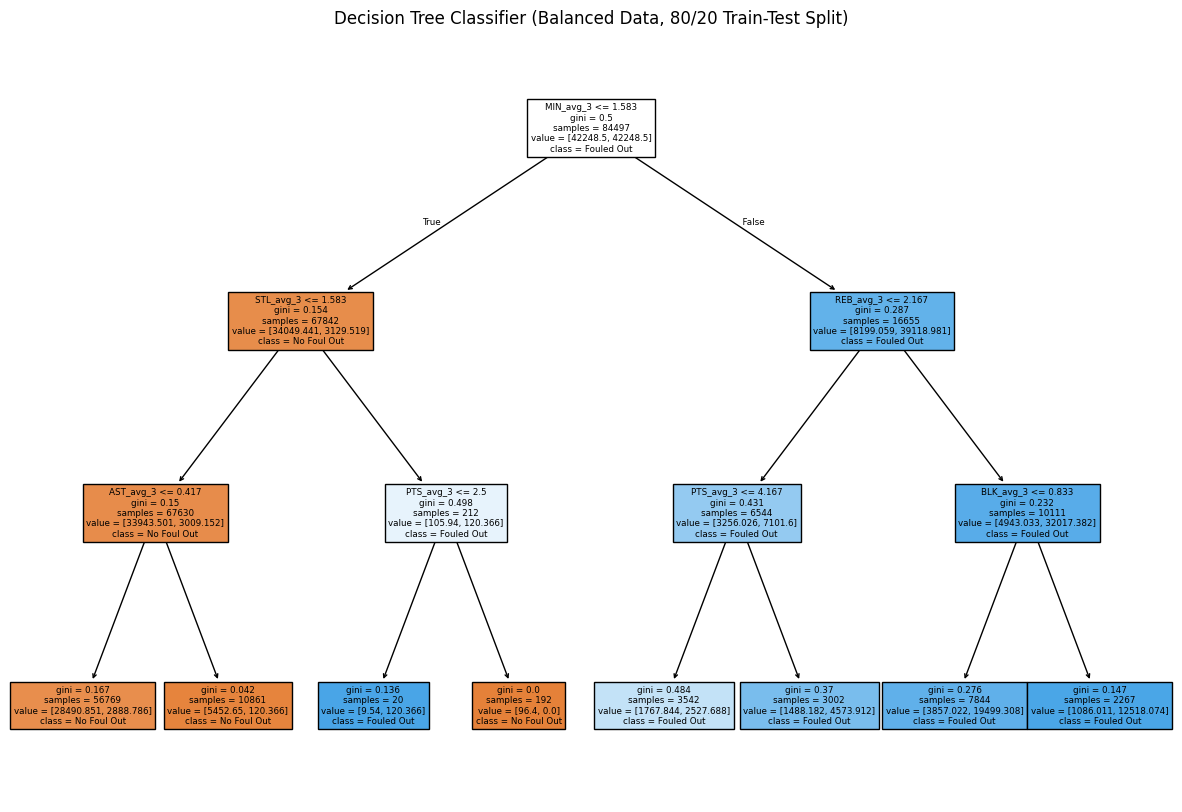

Accuracy on Test Data: 0.80
F1 Score (Test Data): 0.04


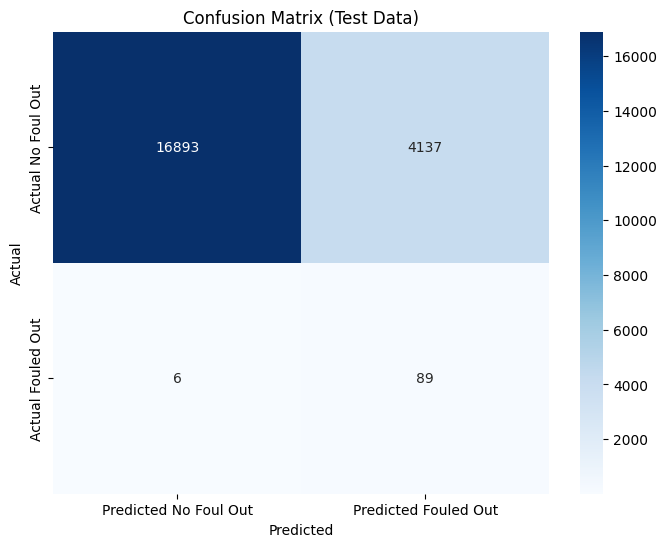

Decision Tree Splitting Rules:
|--- MIN_avg_3 <= 1.58
|   |--- STL_avg_3 <= 1.58
|   |   |--- AST_avg_3 <= 0.42
|   |   |   |--- class: 0
|   |   |--- AST_avg_3 >  0.42
|   |   |   |--- class: 0
|   |--- STL_avg_3 >  1.58
|   |   |--- PTS_avg_3 <= 2.50
|   |   |   |--- class: 1
|   |   |--- PTS_avg_3 >  2.50
|   |   |   |--- class: 0
|--- MIN_avg_3 >  1.58
|   |--- REB_avg_3 <= 2.17
|   |   |--- PTS_avg_3 <= 4.17
|   |   |   |--- class: 1
|   |   |--- PTS_avg_3 >  4.17
|   |   |   |--- class: 1
|   |--- REB_avg_3 >  2.17
|   |   |--- BLK_avg_3 <= 0.83
|   |   |   |--- class: 1
|   |   |--- BLK_avg_3 >  0.83
|   |   |   |--- class: 1

Feature Importances:
      Feature  Importance
0   MIN_avg_3    0.957266
3   REB_avg_3    0.022009
2   PTS_avg_3    0.009743
6   BLK_avg_3    0.005217
5   STL_avg_3    0.003806
4   AST_avg_3    0.001959
1  OREB_avg_3    0.000000
7    TO_avg_3    0.000000


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


#REDUCED WITH BALANCE

# Define predictors and target

# Create binary target for fouling out
# merged_w_noNA['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)
# X_cl_bal = merged_w_noNA[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
#                        'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
# y_cl_bal = merged_w_noNA['Fouled_Out']

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)
X_cl_bal = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                       'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl_bal = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl_bal, X_test_cl_bal, y_train_cl_bal, y_test_cl_bal = train_test_split(
    X_cl_bal, y_cl_bal, test_size=0.2, random_state=42)

# Train decision tree classifier
tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight = 'balanced')
#tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_cl_bal.fit(X_train_cl_bal, y_train_cl_bal)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_cl_bal, feature_names=X_cl_bal.columns, class_names=['No Foul Out', 'Fouled Out'], filled=True)
plt.title("Decision Tree Classifier (Balanced Data, 80/20 Train-Test Split)")
plt.show()

# Evaluate model on test data
accuracy_cl_bal = tree_cl_bal.score(X_test_cl_bal, y_test_cl_bal)
print(f"Accuracy on Test Data: {accuracy_cl_bal:.2f}")

# Predict on test data
y_pred_cl_bal = tree_cl_bal.predict(X_test_cl_bal)

# Calculate F1 score
f1_cl_bal = f1_score(y_test_cl_bal, y_pred_cl_bal)
print(f"F1 Score (Test Data): {f1_cl_bal:.2f}")

# Confusion matrix
cm_cl_bal = confusion_matrix(y_test_cl_bal, y_pred_cl_bal)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cl_bal, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Display decision tree rules
tree_rules_cl_bal = export_text(tree_cl_bal, feature_names=list(X_cl_bal.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_cl_bal)

# Extract feature importance
feature_importances_cl_bal = pd.DataFrame({
    'Feature': X_cl_bal.columns,
    'Importance': tree_cl_bal.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_cl_bal)


<ipython-input-175-48587deee78a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)


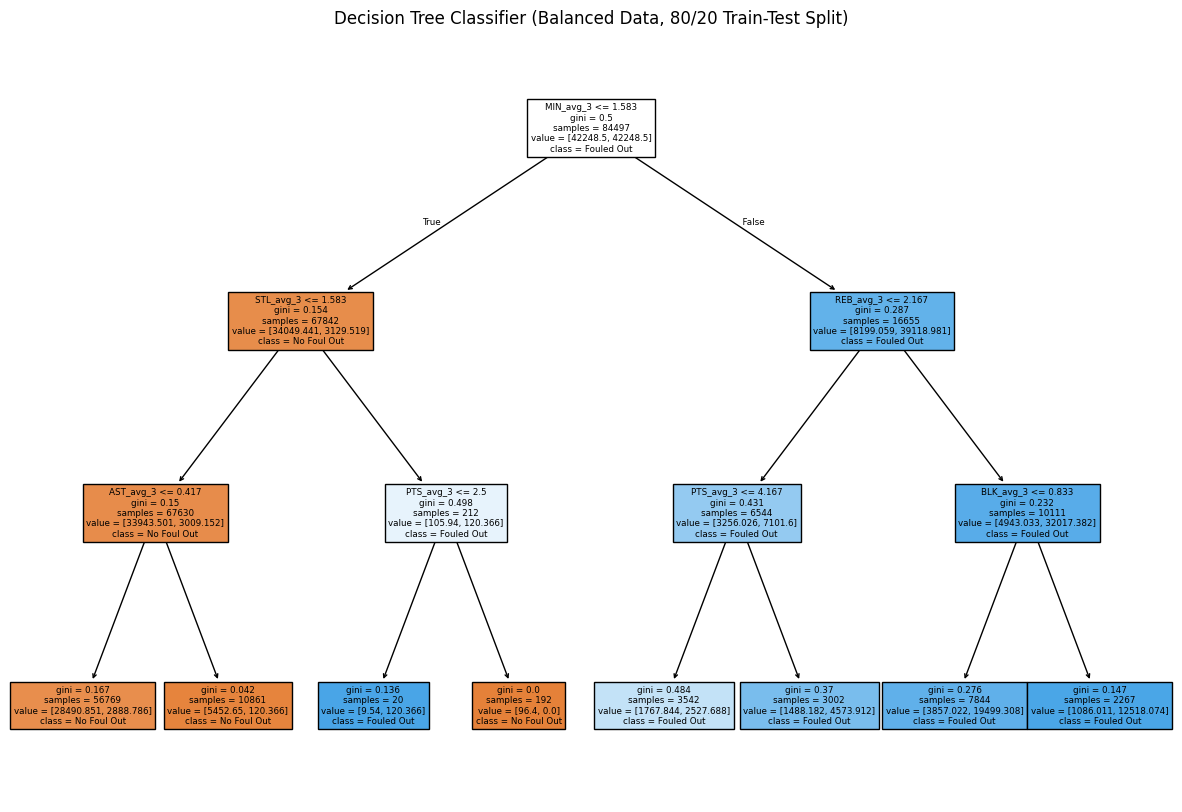

Accuracy on Test Data: 0.80
F1 Score (Test Data): 0.04


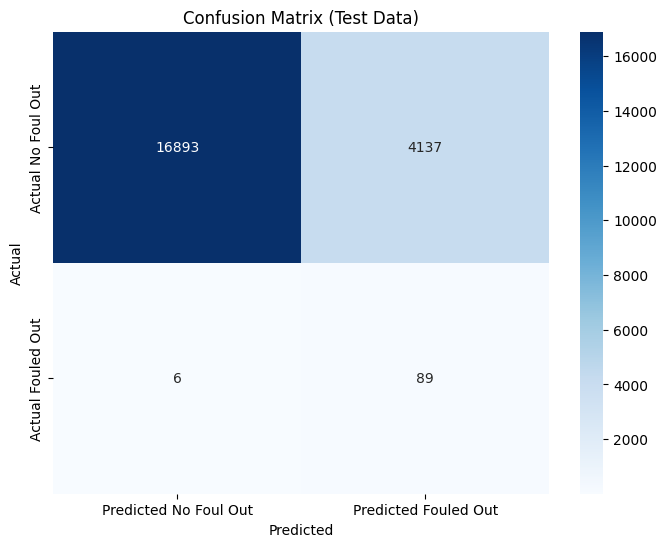

Decision Tree Splitting Rules:
|--- MIN_avg_3 <= 1.58
|   |--- STL_avg_3 <= 1.58
|   |   |--- AST_avg_3 <= 0.42
|   |   |   |--- class: 0
|   |   |--- AST_avg_3 >  0.42
|   |   |   |--- class: 0
|   |--- STL_avg_3 >  1.58
|   |   |--- PTS_avg_3 <= 2.50
|   |   |   |--- class: 1
|   |   |--- PTS_avg_3 >  2.50
|   |   |   |--- class: 0
|--- MIN_avg_3 >  1.58
|   |--- REB_avg_3 <= 2.17
|   |   |--- PTS_avg_3 <= 4.17
|   |   |   |--- class: 1
|   |   |--- PTS_avg_3 >  4.17
|   |   |   |--- class: 1
|   |--- REB_avg_3 >  2.17
|   |   |--- BLK_avg_3 <= 0.83
|   |   |   |--- class: 1
|   |   |--- BLK_avg_3 >  0.83
|   |   |   |--- class: 1

Feature Importances:
      Feature  Importance
0   MIN_avg_3    0.957266
3   REB_avg_3    0.022009
2   PTS_avg_3    0.009743
6   BLK_avg_3    0.005217
5   STL_avg_3    0.003806
4   AST_avg_3    0.001959
1  OREB_avg_3    0.000000
7    TO_avg_3    0.000000


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


#reduced without balance

# Define predictors and target

# Create binary target for fouling out
# merged_w_noNA['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)
# X_cl_bal = merged_w_noNA[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
#                        'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
# y_cl_bal = merged_w_noNA['Fouled_Out']

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)
X_cl_bal = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                       'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl_bal = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl_bal, X_test_cl_bal, y_train_cl_bal, y_test_cl_bal = train_test_split(
    X_cl_bal, y_cl_bal, test_size=0.2, random_state=42)

# Train decision tree classifier
tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight = 'balanced')
#tree_cl_bal = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_cl_bal.fit(X_train_cl_bal, y_train_cl_bal)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_cl_bal, feature_names=X_cl_bal.columns, class_names=['No Foul Out', 'Fouled Out'], filled=True)
plt.title("Decision Tree Classifier (Balanced Data, 80/20 Train-Test Split)")
plt.show()

# Evaluate model on test data
accuracy_cl_bal = tree_cl_bal.score(X_test_cl_bal, y_test_cl_bal)
print(f"Accuracy on Test Data: {accuracy_cl_bal:.2f}")

# Predict on test data
y_pred_cl_bal = tree_cl_bal.predict(X_test_cl_bal)

# Calculate F1 score
f1_cl_bal = f1_score(y_test_cl_bal, y_pred_cl_bal)
print(f"F1 Score (Test Data): {f1_cl_bal:.2f}")

# Confusion matrix
cm_cl_bal = confusion_matrix(y_test_cl_bal, y_pred_cl_bal)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cl_bal, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Display decision tree rules
tree_rules_cl_bal = export_text(tree_cl_bal, feature_names=list(X_cl_bal.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_cl_bal)

# Extract feature importance
feature_importances_cl_bal = pd.DataFrame({
    'Feature': X_cl_bal.columns,
    'Importance': tree_cl_bal.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_cl_bal)


<ipython-input-176-3aae14425d49>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)


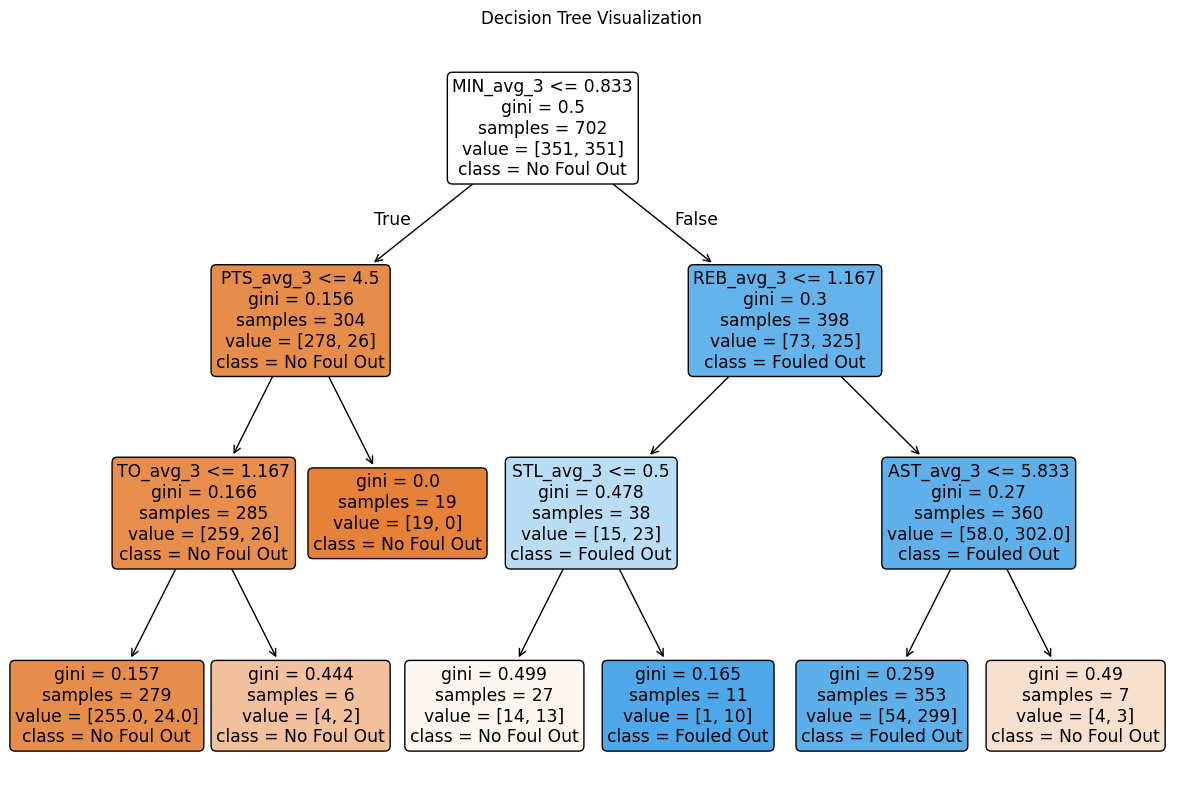

Accuracy (Test Data): 0.83
Precision (Test Data): 0.02
Recall (Test Data): 0.85
F1 Score (Test Data): 0.04


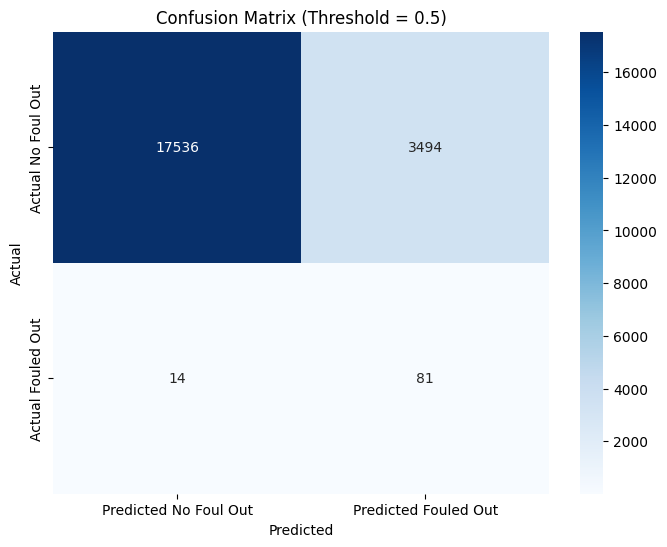

Decision Tree Splitting Rules:
|--- MIN_avg_3 <= 0.83
|   |--- PTS_avg_3 <= 4.50
|   |   |--- TO_avg_3 <= 1.17
|   |   |   |--- class: 0
|   |   |--- TO_avg_3 >  1.17
|   |   |   |--- class: 0
|   |--- PTS_avg_3 >  4.50
|   |   |--- class: 0
|--- MIN_avg_3 >  0.83
|   |--- REB_avg_3 <= 1.17
|   |   |--- STL_avg_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- STL_avg_3 >  0.50
|   |   |   |--- class: 1
|   |--- REB_avg_3 >  1.17
|   |   |--- AST_avg_3 <= 5.83
|   |   |   |--- class: 1
|   |   |--- AST_avg_3 >  5.83
|   |   |   |--- class: 0

Feature Importances:
      Feature  Importance
0   MIN_avg_3    0.948371
3   REB_avg_3    0.019315
5   STL_avg_3    0.014714
4   AST_avg_3    0.012374
7    TO_avg_3    0.003699
2   PTS_avg_3    0.001526
1  OREB_avg_3    0.000000
6   BLK_avg_3    0.000000

Threshold | Accuracy | Precision | Recall | F1 Score
0.01       | 0.06     | 0.00     | 0.99  | 0.01
0.10       | 0.79     | 0.02     | 0.95  | 0.04
0.30       | 0.79     | 0.02     | 0.95  | 0.04

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#reduced with classification and random undersampling mods

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)

# Define predictors and target
X_cl = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                   'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_cl = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(
    X_cl, y_cl, test_size=0.2, random_state=42)

# Apply Random Undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_cl, y_train_cl)

# Train decision tree classifier with hyperparameter adjustments
tree_cl_undersampled = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,               # Limit tree depth to control overfitting
    min_samples_split=10,      # Require at least 10 samples to split a node
    min_samples_leaf=5,        # Require at least 5 samples in a leaf
    ccp_alpha=0.0,             # Disable pruning for now
    class_weight=None          # Not needed due to undersampling
)
tree_cl_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    tree_cl_undersampled,
    feature_names=X_cl.columns,
    class_names=['No Foul Out', 'Fouled Out'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

# Evaluate model on test data
y_pred_probs_undersampled = tree_cl_undersampled.predict_proba(X_test_cl)[:, 1]  # Get probabilities for the positive class

# Adjust the classification threshold
threshold = 0.5  # Default threshold
y_pred_undersampled = (y_pred_probs_undersampled >= threshold).astype(int)

# Calculate metrics
accuracy_undersampled = accuracy_score(y_test_cl, y_pred_undersampled)
precision_undersampled = precision_score(y_test_cl, y_pred_undersampled, zero_division=0)
recall_undersampled = recall_score(y_test_cl, y_pred_undersampled, zero_division=0)
f1_undersampled = f1_score(y_test_cl, y_pred_undersampled, zero_division=0)

print(f"Accuracy (Test Data): {accuracy_undersampled:.2f}")
print(f"Precision (Test Data): {precision_undersampled:.2f}")
print(f"Recall (Test Data): {recall_undersampled:.2f}")
print(f"F1 Score (Test Data): {f1_undersampled:.2f}")

# Confusion matrix
cm_undersampled = confusion_matrix(y_test_cl, y_pred_undersampled)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_undersampled, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

# Display decision tree rules
tree_rules_undersampled = export_text(tree_cl_undersampled, feature_names=list(X_cl.columns))
print("Decision Tree Splitting Rules:")
print(tree_rules_undersampled)

# Extract feature importance
feature_importances_undersampled = pd.DataFrame({
    'Feature': X_cl.columns,
    'Importance': tree_cl_undersampled.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_undersampled)

# Experiment with thresholds
thresholds = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
print("\nThreshold | Accuracy | Precision | Recall | F1 Score")
for t in thresholds:
    y_pred_adj = (y_pred_probs_undersampled >= t).astype(int)
    accuracy = accuracy_score(y_test_cl, y_pred_adj)
    precision = precision_score(y_test_cl, y_pred_adj, zero_division=0)
    recall = recall_score(y_test_cl, y_pred_adj, zero_division=0)
    f1 = f1_score(y_test_cl, y_pred_adj, zero_division=0)
    print(f"{t:.2f}       | {accuracy:.2f}     | {precision:.2f}     | {recall:.2f}  | {f1:.2f}")


In [197]:
#trying ensemble models: random foroest and gradient boosting

<ipython-input-198-c57583476a7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)


Gradient Boosting - Accuracy: 1.00
Gradient Boosting - Precision: 0.00
Gradient Boosting - Recall: 0.00
Gradient Boosting - F1 Score: 0.00


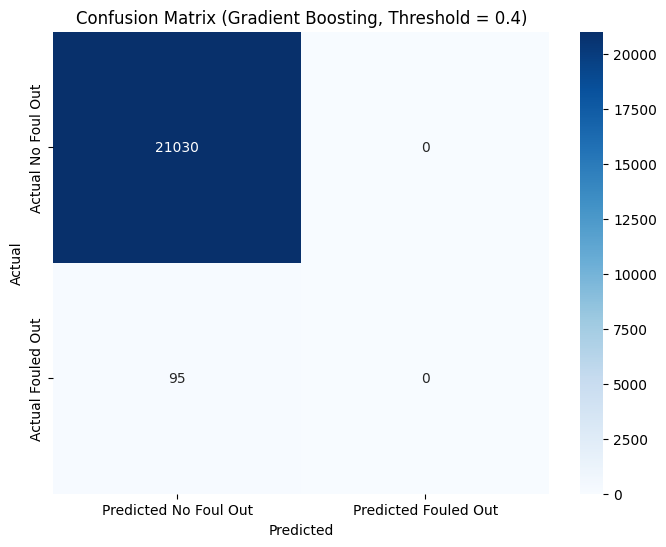

In [198]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)

# Define predictors and target
X_gb = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                   'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_gb = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(
    X_gb, y_gb, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    random_state=42,
    n_estimators=100,       # Number of boosting stages
    learning_rate=0.1,      # Shrinks contribution of each tree
    max_depth=3,            # Maximum tree depth
    min_samples_split=10,   # Minimum samples to split a node
    min_samples_leaf=5      # Minimum samples in a leaf
)
gb_clf.fit(X_train_gb, y_train_gb)

# Predict probabilities on test data
y_pred_probs_gb = gb_clf.predict_proba(X_test_gb)[:, 1]

# Adjust the classification threshold
threshold = 0.5
y_pred_gb = (y_pred_probs_gb >= threshold).astype(int)

#CHANGED TO 0.4, NO DIFFERENCE, REVERTED

# Evaluate metrics
accuracy_gb = accuracy_score(y_test_gb, y_pred_gb)
precision_gb = precision_score(y_test_gb, y_pred_gb, zero_division=0)
recall_gb = recall_score(y_test_gb, y_pred_gb, zero_division=0)
f1_gb = f1_score(y_test_gb, y_pred_gb, zero_division=0)

print(f"Gradient Boosting - Accuracy: {accuracy_gb:.2f}")
print(f"Gradient Boosting - Precision: {precision_gb:.2f}")
print(f"Gradient Boosting - Recall: {recall_gb:.2f}")
print(f"Gradient Boosting - F1 Score: {f1_gb:.2f}")

# Confusion matrix
cm_gb = confusion_matrix(y_test_gb, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Gradient Boosting, Threshold = {threshold})')
plt.show()


 98%|===================| 20758/21125 [00:17<00:00]       

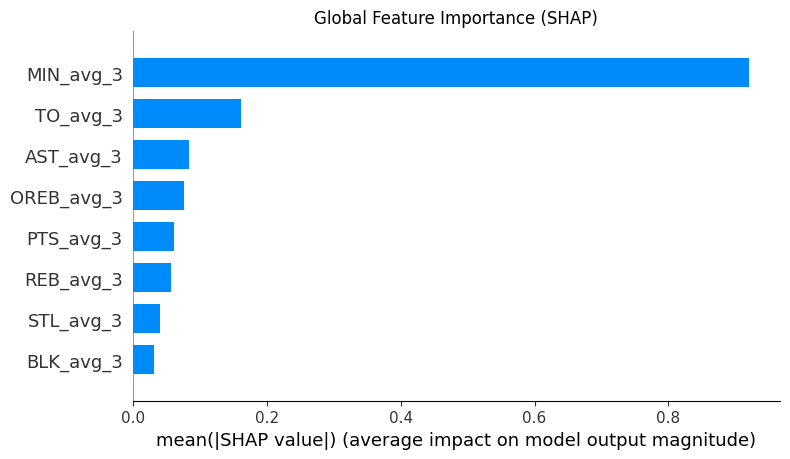


Approximate Decision Rules for Sample:
If MIN_avg_3 = 0.00, it contributes -0.59 to the prediction.
If TO_avg_3 = 0.00, it contributes -0.13 to the prediction.
If AST_avg_3 = 0.00, it contributes 0.06 to the prediction.
If OREB_avg_3 = 0.00, it contributes -0.05 to the prediction.
If PTS_avg_3 = 0.00, it contributes 0.03 to the prediction.
If REB_avg_3 = 0.00, it contributes -0.02 to the prediction.
If BLK_avg_3 = 0.00, it contributes -0.02 to the prediction.
If STL_avg_3 = 0.00, it contributes -0.00 to the prediction.


In [199]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Initialize SHAP explainer
explainer = shap.Explainer(gb_clf, X_train_gb)

# Get SHAP values for the test set
shap_values = explainer(X_test_gb)

# 1. Visualize global feature importance using SHAP (replaces previous feature importance visualization)
plt.title("Global Feature Importance (SHAP)")
shap.summary_plot(shap_values, X_test_gb, plot_type="bar")  # Bar chart for global importance

# 2. SHAP decision rules for an individual prediction
# Choose an individual sample (e.g., the first test instance)
sample_idx = 0
single_shap_values = shap_values[sample_idx]
single_sample = X_test_gb.iloc[sample_idx, :]

# Display approximate decision rules in text format
print("\nApproximate Decision Rules for Sample:")
for feature, shap_value, value in sorted(zip(X_test_gb.columns, single_shap_values.values, single_sample), key=lambda x: abs(x[1]), reverse=True):
    print(f"If {feature} = {value:.2f}, it contributes {shap_value:.2f} to the prediction.")

# Visualize SHAP values for this individua


SHAP interpretation is not scaled on 0-1, but shows relative feature importance on classification (0.8 units)

Gradient Boosting - Accuracy: 0.81
Gradient Boosting - Precision: 0.02
Gradient Boosting - Recall: 0.94
Gradient Boosting - F1 Score: 0.04


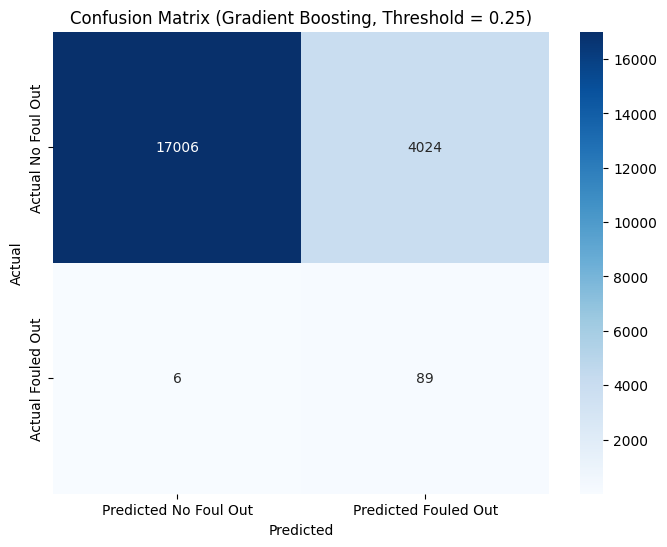

In [200]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#adjustments to hyperparmeters and lowering threshold classification to favorm inority

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_gb),
    y=y_train_gb
)
sample_weights = np.where(y_train_gb == 0, class_weights[0], class_weights[1])

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    random_state=42,
    n_estimators=200,       # More trees for better learning
    learning_rate=0.01,     # Slower learning rate
    max_depth=5,            # Moderate depth
    min_samples_split=5,    # Smaller splits
    min_samples_leaf=2      # Smaller leaves
)
gb_clf.fit(X_train_gb, y_train_gb, sample_weight=sample_weights)

# Predict probabilities on test data
y_pred_probs_gb = gb_clf.predict_proba(X_test_gb)[:, 1]

# Adjust the classification threshold
threshold = 0.25  # Lower threshold to favor the minority class
y_pred_gb = (y_pred_probs_gb >= threshold).astype(int)

#CHANGE CHANGE CHANGE 0.1 TO 0.25

# Evaluate metrics
accuracy_gb = accuracy_score(y_test_gb, y_pred_gb)
precision_gb = precision_score(y_test_gb, y_pred_gb, zero_division=0)
recall_gb = recall_score(y_test_gb, y_pred_gb, zero_division=0)
f1_gb = f1_score(y_test_gb, y_pred_gb, zero_division=0)

print(f"Gradient Boosting - Accuracy: {accuracy_gb:.2f}")
print(f"Gradient Boosting - Precision: {precision_gb:.2f}")
print(f"Gradient Boosting - Recall: {recall_gb:.2f}")
print(f"Gradient Boosting - F1 Score: {f1_gb:.2f}")

# Confusion matrix
cm_gb = confusion_matrix(y_test_gb, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Gradient Boosting, Threshold = {threshold})')
plt.show()


 99%|===================| 21002/21125 [01:56<00:00]       

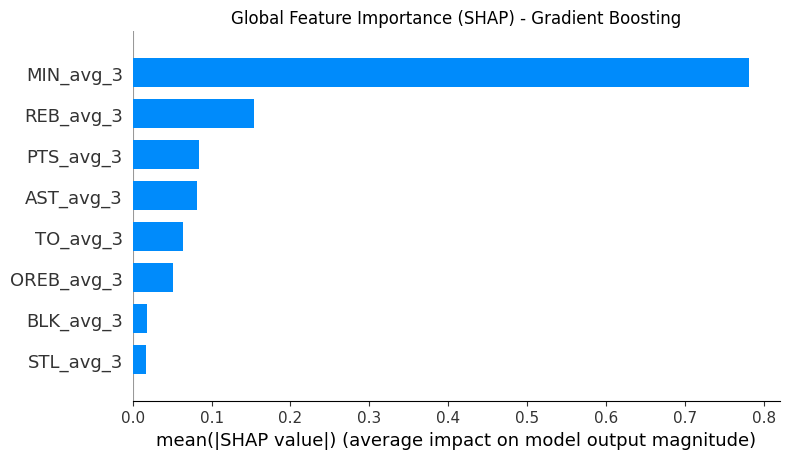


Approximate Decision Rules for Sample:
If MIN_avg_3 = 0.00, it contributes -0.49 to the prediction.
If REB_avg_3 = 0.00, it contributes -0.09 to the prediction.
If PTS_avg_3 = 0.00, it contributes 0.08 to the prediction.
If AST_avg_3 = 0.00, it contributes 0.04 to the prediction.
If OREB_avg_3 = 0.00, it contributes -0.03 to the prediction.
If TO_avg_3 = 0.00, it contributes -0.02 to the prediction.
If BLK_avg_3 = 0.00, it contributes 0.01 to the prediction.
If STL_avg_3 = 0.00, it contributes -0.00 to the prediction.

SHAP Force Plot for Individual Prediction:



SHAP Dependence Plot (Feature Interaction):


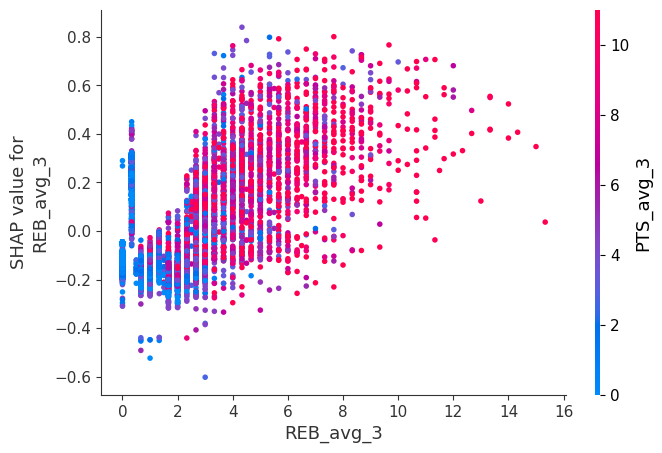


Threshold-Specific SHAP Interpretation:

Sample 1: Predicted Class = 1
If MIN_avg_3 = 0.00, it contributes -0.49 to the prediction.
If REB_avg_3 = 0.00, it contributes -0.09 to the prediction.
If PTS_avg_3 = 0.00, it contributes 0.08 to the prediction.
If AST_avg_3 = 0.00, it contributes 0.04 to the prediction.
If OREB_avg_3 = 0.00, it contributes -0.03 to the prediction.
If TO_avg_3 = 0.00, it contributes -0.02 to the prediction.
If BLK_avg_3 = 0.00, it contributes 0.01 to the prediction.
If STL_avg_3 = 0.00, it contributes -0.00 to the prediction.

Sample 2: Predicted Class = 1
If MIN_avg_3 = 0.00, it contributes -0.46 to the prediction.
If REB_avg_3 = 1.00, it contributes -0.15 to the prediction.
If TO_avg_3 = 0.33, it contributes -0.08 to the prediction.
If AST_avg_3 = 0.00, it contributes 0.06 to the prediction.
If PTS_avg_3 = 0.67, it contributes -0.05 to the prediction.
If OREB_avg_3 = 0.00, it contributes -0.04 to the prediction.
If STL_avg_3 = 0.00, it contributes 0.00 to the

In [201]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Initialize SHAP explainer for the updated Gradient Boosting model
explainer = shap.Explainer(gb_clf, X_train_gb)

# Get SHAP values for the test set
shap_values = explainer(X_test_gb)

# 1. Global Feature Importance (SHAP)
plt.title("Global Feature Importance (SHAP) - Gradient Boosting")
shap.summary_plot(shap_values, X_test_gb, plot_type="bar")  # Bar chart for global importance

# 2. SHAP Decision Rules for an Individual Prediction
# Choose an individual sample (e.g., the first test instance)
sample_idx = 0
single_shap_values = shap_values[sample_idx]
single_sample = X_test_gb.iloc[sample_idx, :]

# Display approximate decision rules in text format
print("\nApproximate Decision Rules for Sample:")
for feature, shap_value, value in sorted(zip(X_test_gb.columns, single_shap_values.values, single_sample), key=lambda x: abs(x[1]), reverse=True):
    print(f"If {feature} = {value:.2f}, it contributes {shap_value:.2f} to the prediction.")

# Visualize SHAP values for this individual prediction
print("\nSHAP Force Plot for Individual Prediction:")
shap.initjs()  # Enable interactive visualization (only works in Jupyter)
shap.force_plot(
    explainer.expected_value,        # Correct: Base value is a scalar
    single_shap_values.values,       # SHAP values for the chosen sample
    single_sample                    # Feature values for the chosen sample
)

# 3. SHAP Dependence Plot (Feature Interaction Visualization)
# Example: Interaction between REB_avg_3 and PTS_avg_3
print("\nSHAP Dependence Plot (Feature Interaction):")
shap.dependence_plot("REB_avg_3", shap_values.values, X_test_gb, interaction_index="PTS_avg_3")

# 4. Threshold-Specific SHAP Interpretation
print("\nThreshold-Specific SHAP Interpretation:")
threshold = 0.1  # Lower threshold favoring the minority class
y_pred_probs_gb = gb_clf.predict_proba(X_test_gb)[:, 1]
y_pred_gb = (y_pred_probs_gb >= threshold).astype(int)

# Evaluate individual predictions for SHAP analysis
for idx in range(5):  # Analyze the first 5 samples (can adjust as needed)
    sample_shap_values = shap_values[idx]
    sample_features = X_test_gb.iloc[idx, :]
    prediction = y_pred_gb[idx]
    print(f"\nSample {idx + 1}: Predicted Class = {prediction}")
    for feature, shap_value, value in sorted(zip(X_test_gb.columns, sample_shap_values.values, sample_features), key=lambda x: abs(x[1]), reverse=True):
        print(f"If {feature} = {value:.2f}, it contributes {shap_value:.2f} to the prediction.")


In [202]:
#random forest

<ipython-input-203-685a76d03857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)


Random Forest - Accuracy: 0.82
Random Forest - Precision: 0.02
Random Forest - Recall: 0.93
Random Forest - F1 Score: 0.05


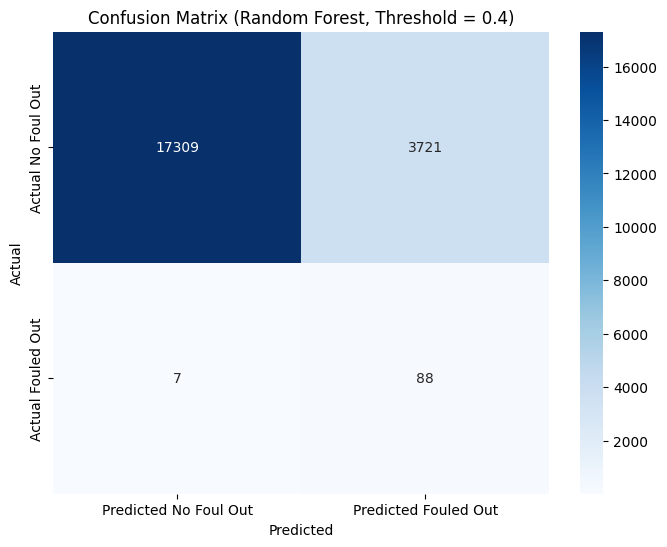

In [203]:
from sklearn.ensemble import RandomForestClassifier

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)

# Define predictors and target
X_rf = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                      'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_rf = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,       # Number of trees
    max_depth=5,            # Maximum tree depth
    min_samples_split=10,   # Minimum samples to split a node
    min_samples_leaf=5,     # Minimum samples in a leaf
    class_weight='balanced' # Balances class weights
)
rf_clf.fit(X_train_rf, y_train_rf)

# Predict probabilities on test data
y_pred_probs_rf = rf_clf.predict_proba(X_test_rf)[:, 1]

# Adjust the classification threshold
threshold = 0.5
y_pred_rf = (y_pred_probs_rf >= threshold).astype(int)

#CHANGED TO 0.4, NO DIFFERENCE ,REVERTED

# Evaluate metrics
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test_rf, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test_rf, y_pred_rf, zero_division=0)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - F1 Score: {f1_rf:.2f}")

# Confusion matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Random Forest, Threshold = {threshold})')
plt.show()


<ipython-input-204-5b3e73ab4458>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='Blues_r')


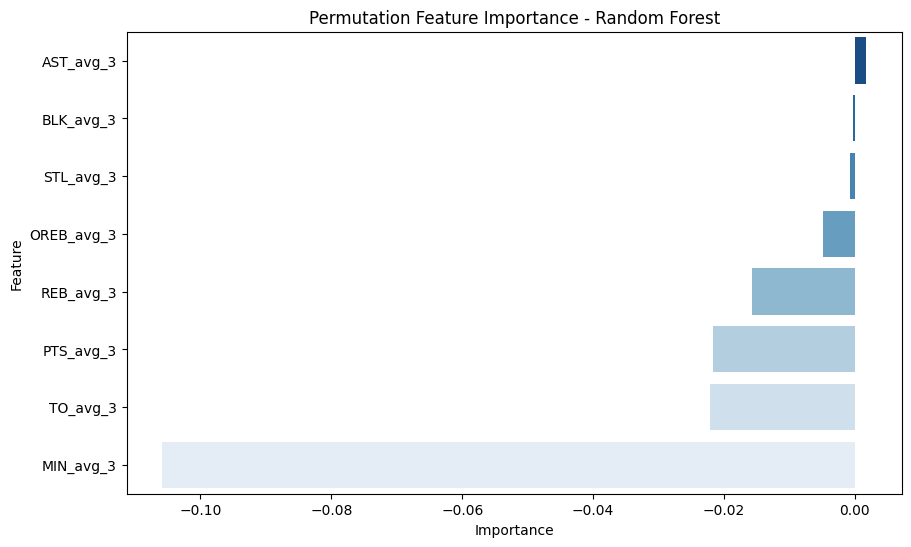

In [204]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_clf, X_test_rf, y_test_rf, n_repeats=10, random_state=42)

# Convert results to a DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='Blues_r')
plt.title("Permutation Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<ipython-input-205-d7a3ae7ad577>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)


Random Forest - Accuracy: 0.86
Random Forest - Precision: 0.03
Random Forest - Recall: 0.78
Random Forest - F1 Score: 0.05


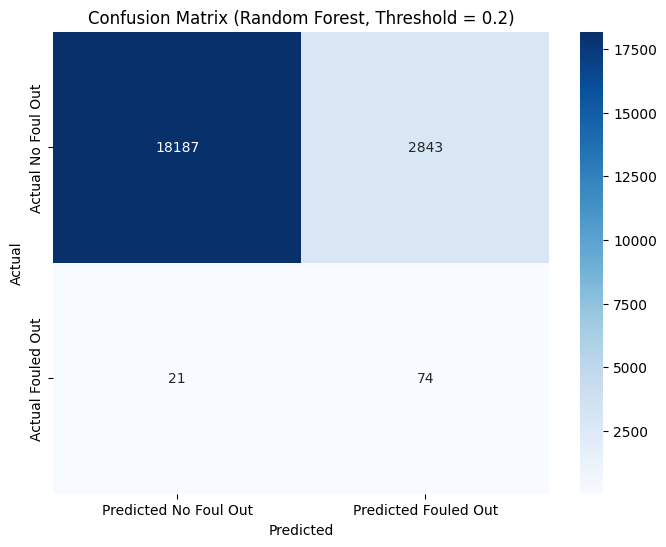

In [205]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary target for fouling out
merged_w_3['Fouled_Out'] = (merged_w_3['PF'] >= 6).astype(int)

# Define predictors and target
X_rf = merged_w_3[['MIN_avg_3', 'OREB_avg_3', 'PTS_avg_3', 'REB_avg_3',
                   'AST_avg_3', 'STL_avg_3', 'BLK_avg_3', 'TO_avg_3']]
y_rf = merged_w_3['Fouled_Out']

# Split data into training and testing sets (80/20 split)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_rf_smote, y_train_rf_smote = smote.fit_resample(X_train_rf, y_train_rf)

# Train Random Forest Classifier with tuned parameters
rf_clf = RandomForestClassifier(
    random_state=42,
    n_estimators=300,         # Number of trees in the forest
    max_depth=10,             # Maximum tree depth
    min_samples_split=5,      # Minimum number of samples to split a node
    min_samples_leaf=2,       # Minimum number of samples in a leaf
    class_weight='balanced_subsample'  # Balance classes at tree level
)
rf_clf.fit(X_train_rf_smote, y_train_rf_smote)

# Predict probabilities on test data
y_pred_probs_rf = rf_clf.predict_proba(X_test_rf)[:, 1]

# Adjust the classification threshold
threshold = 0.4

#CHANGE TO 0.2, MADE IT WORSE, REVERT TO 0.4


y_pred_rf = (y_pred_probs_rf >= threshold).astype(int)

# Evaluate metrics
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test_rf, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test_rf, y_pred_rf, zero_division=0)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - F1 Score: {f1_rf:.2f}")

# Confusion matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Random Forest, Threshold = {threshold})')
plt.show()


<ipython-input-206-f115a7a7b7be>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df_variant, palette='Blues_r')


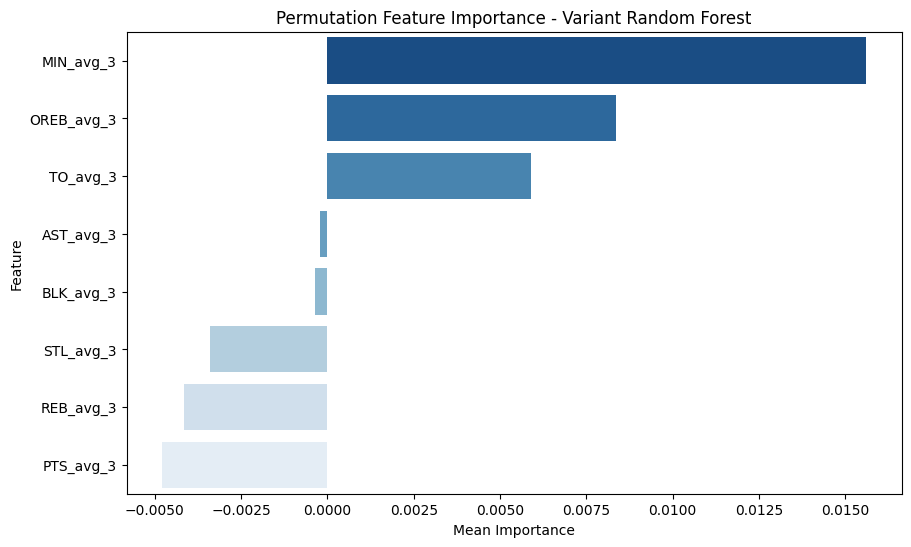

In [206]:
from sklearn.inspection import permutation_importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate permutation feature importance for the Random Forest Variant
perm_importance_variant = permutation_importance(
    rf_clf, X_test_rf, y_test_rf, n_repeats=10, random_state=42, scoring="f1"
)

# Convert results to a DataFrame
perm_importance_df_variant = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': perm_importance_variant.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df_variant, palette='Blues_r')
plt.title("Permutation Feature Importance - Variant Random Forest")
plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.show()


In [207]:
#workign with a subset of 2017-2019 to see if it makes a difference

In [208]:
# Add a game count column for each player
seasons_2017_2019_df['game_count'] = seasons_2017_2019_df.groupby('PLAYER_ID').cumcount() + 1

# Filter players with at least 20 games
seasons_2017_2019_df = seasons_2017_2019_df[seasons_2017_2019_df['game_count'] >= 20]

#original 106765 rows × 49 columns

<ipython-input-208-cbea390940e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_2017_2019_df['game_count'] = seasons_2017_2019_df.groupby('PLAYER_ID').cumcount() + 1


In [209]:
seasons_2017_2019_df

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  \
563214    2017-03-29  21601116            Final    1610612763   
562806    2017-03-31  21601131            Final    1610612763   
562286    2017-04-02  21601143            Final    1610612747   
562103    2017-04-04  21601161            Final    1610612759   
561778    2017-04-05  21601167            Final    1610612763   
...              ...       ...              ...           ...   
102825    2019-12-31  21900501            Final    1610612745   
102945    2019-12-30  21900493            Final    1610612741   
103092    2019-12-29  21900488            Final    1610612740   
103097    2019-12-29  21900488            Final    1610612740   
103098    2019-12-29  21900488            Final    1610612740   

        VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
563214       1610612754    2017    1610612763     110.0        0.466   
562806       1610612742    2017    1610612763      99.0        0.467   
562286       1610612763    2017    1610612747     108.0        0.471   
562103       1610612763    2017    1610612759      95.0        0.438   
561778       1610612760    2017    1610612763     100.0        0.474   
...                 ...     ...           ...       ...          ...   
102825       1610612743    2019    1610612745     130.0        0.529   
102945       1610612749    2019    1610612741     102.0        0.374   
103092       1610612745    2019    1610612740     127.0        0.490   
103097       1610612745    2019    1610612740     127.0        0.490   
103098       1610612745    2019    1610612740     127.0        0.490   

        FT_PCT_home  ...  DREB_avg_10  REB_avg_10  AST_avg_10  STL_avg_10  \
563214        0.889  ...          2.1         2.7         2.0         1.3   
562806        0.900  ...          2.6         3.3         1.7         1.4   
562286        0.778  ...          3.1         3.9         2.0         1.2   
562103        0.778  ...          2.7         3.4         1.8         0.9   
561778        0.810  ...          2.7         3.3         1.8         0.9   
...             ...  ...          ...         ...         ...         ...   
102825        0.710  ...          0.6         0.6         0.9         0.3   
102945        0.625  ...          3.2         3.6         2.7         0.6   
103092        0.692  ...          3.2         4.6         1.3         0.5   
103097        0.692  ...          1.0         1.0         0.7         0.2   
103098        0.692  ...          0.3         0.3         0.2         0.0   

        BLK_avg_10  TO_avg_10  PF_avg_10  PTS_avg_10  PLUS_MINUS_avg_10  \
563214         0.5        0.7        2.3         8.1               -0.3   
562806         0.5        0.8        2.3         9.8                4.1   
562286         0.6        1.1        2.4         9.7                4.0   
562103         0.6        1.0        1.9         7.3                3.1   
561778         0.5        1.1        1.9         7.4                1.8   
...            ...        ...        ...         ...                ...   
102825         0.2        0.4        0.3         4.3               -1.1   
102945         0.3        1.9        1.0         8.6               -1.3   
103092         1.2        0.8        2.9         7.1                2.0   
103097         0.2        0.3        0.5         2.6               -1.5   
103098         0.1        0.2        0.5         1.3                0.8   

        Fouled_Out  
563214           0  
562806           0  
562286           0  
562103           0  
561778           0  
...            ...  
102825           0  
102945           0  
103092           0  
103097           0  
103098           0  

[78765 rows x 71 columns]

In [210]:
# Define player-level statistics for rolling averages
player_vars = [
    'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
    'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'
]

# Calculate rolling averages for the last 10 games
for var in player_vars:
    col_name = f"{var}_avg_10"
    seasons_2017_2019_df[col_name] = (
        seasons_2017_2019_df.groupby('PLAYER_ID')[var]
        .transform(lambda x: x.shift(1).rolling(10, min_periods=1).mean())
    )


<ipython-input-210-51c781c0bc9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_2017_2019_df[col_name] = (


<ipython-input-211-b00c1f862451>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_2017_2019_df['Fouled_Out'] = (seasons_2017_2019_df['PF'] >= 6).astype(int)


Classification Accuracy: 0.72
Classification F1 Score: 0.04


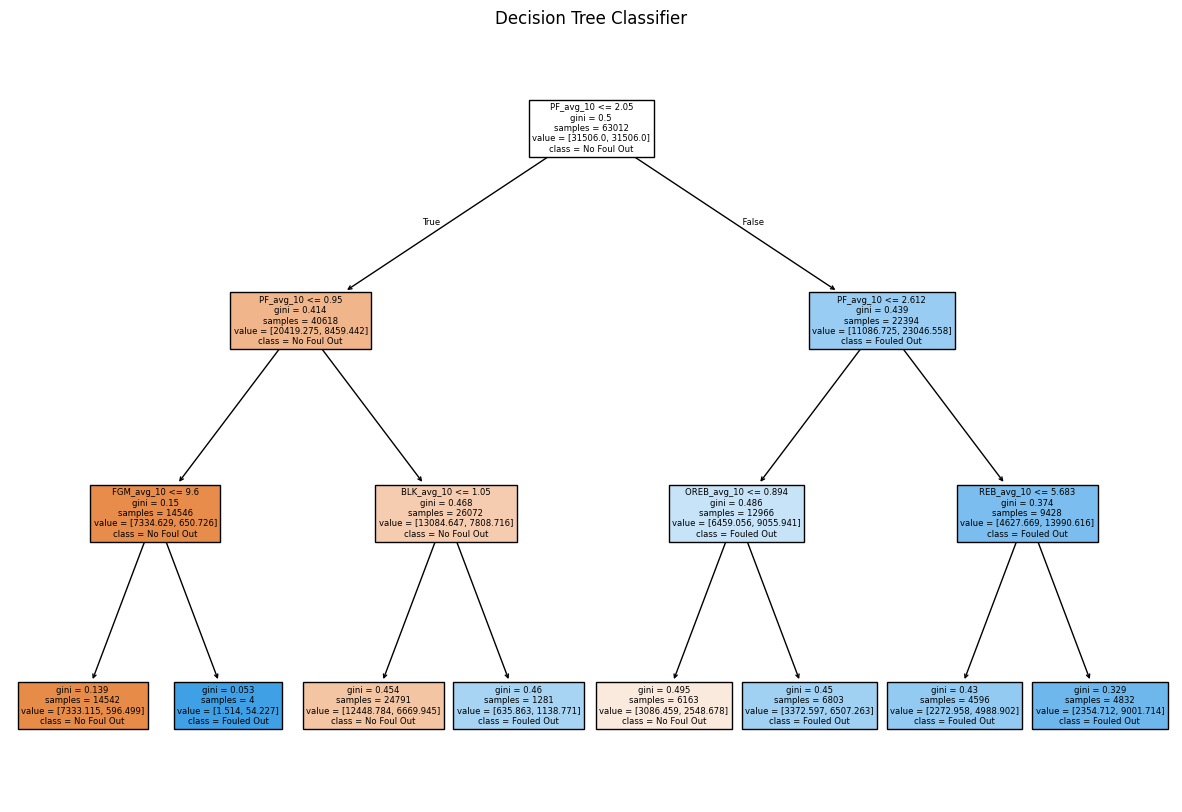

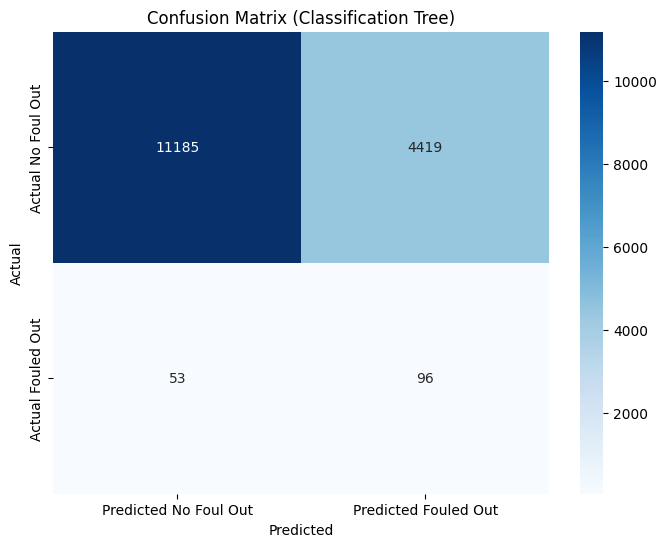

Classification Report:
              precision    recall  f1-score   support

 No Foul Out       1.00      0.72      0.83     15604
  Fouled Out       0.02      0.64      0.04       149

    accuracy                           0.72     15753
   macro avg       0.51      0.68      0.44     15753
weighted avg       0.99      0.72      0.83     15753



In [211]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create binary target for fouling out
seasons_2017_2019_df['Fouled_Out'] = (seasons_2017_2019_df['PF'] >= 6).astype(int)

# Define predictors and target
X_cl = seasons_2017_2019_df[[col for col in seasons_2017_2019_df.columns if '_avg_10' in col]]
y_cl = seasons_2017_2019_df['Fouled_Out']

# Split data into training and testing sets
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, test_size=0.2, random_state=42)

# Train decision tree classifier
tree_cl = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced')
tree_cl.fit(X_train_cl, y_train_cl)

# Evaluate the model
accuracy_cl = tree_cl.score(X_test_cl, y_test_cl)
f1_cl = f1_score(y_test_cl, tree_cl.predict(X_test_cl))
print(f"Classification Accuracy: {accuracy_cl:.2f}")
print(f"Classification F1 Score: {f1_cl:.2f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_cl, feature_names=X_cl.columns, class_names=['No Foul Out', 'Fouled Out'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

# Generate predictions
y_pred_cl = tree_cl.predict(X_test_cl)

# Classification matrix (confusion matrix)
cm_cl = confusion_matrix(y_test_cl, y_pred_cl)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cl, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Foul Out', 'Predicted Fouled Out'],
            yticklabels=['Actual No Foul Out', 'Actual Fouled Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Classification Tree)')
plt.show()

# Classification report (optional, detailed metrics)
print("Classification Report:")
print(classification_report(y_test_cl, y_pred_cl, target_names=['No Foul Out', 'Fouled Out']))


<ipython-input-212-6cbb76722d8f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_2017_2019_df['Fouled_Out'] = (seasons_2017_2019_df['PF'] >= 6).astype(int)


Classification Accuracy: 0.99
Classification F1 Score: 0.00


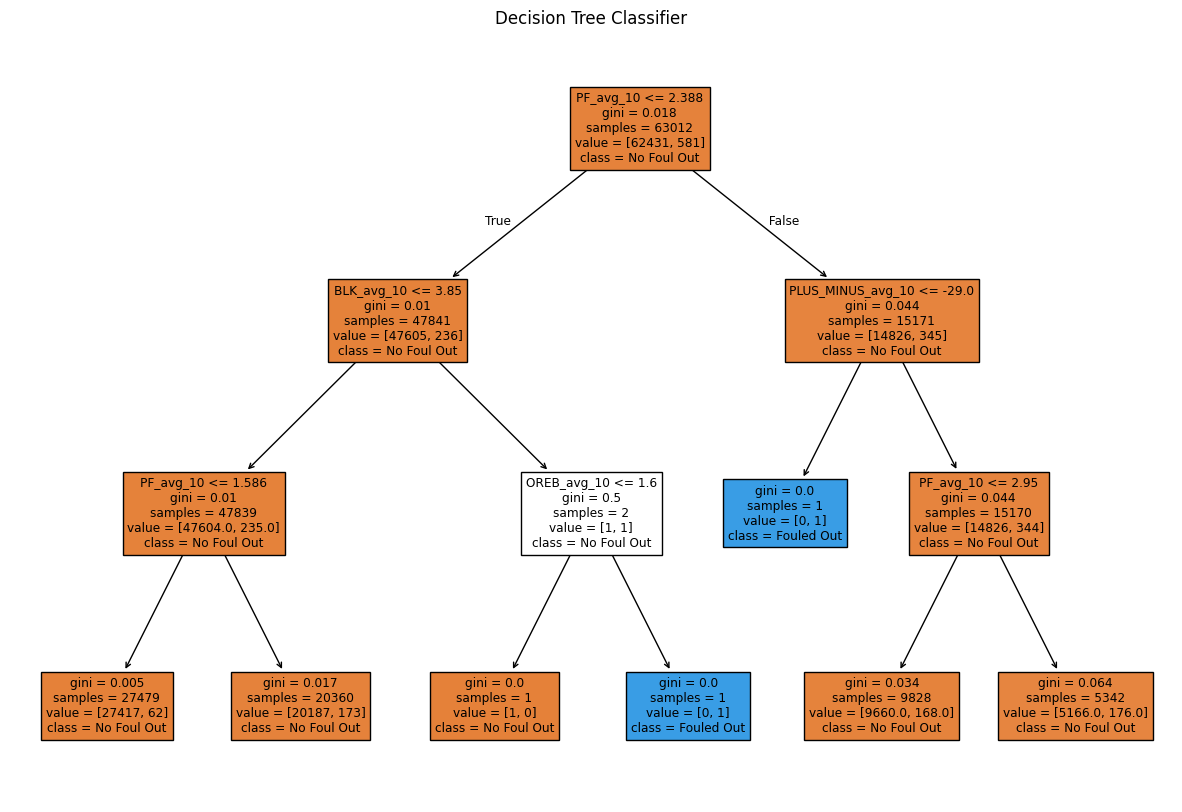

In [212]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create binary target for fouling out
seasons_2017_2019_df['Fouled_Out'] = (seasons_2017_2019_df['PF'] >= 6).astype(int)

# Define predictors and target
X_cl = seasons_2017_2019_df[[col for col in seasons_2017_2019_df.columns if '_avg_10' in col]]
y_cl = seasons_2017_2019_df['Fouled_Out']

# Split data into training and testing sets
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, test_size=0.2, random_state=42)

# Train decision tree classifier
tree_cl = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_cl.fit(X_train_cl, y_train_cl)

# Evaluate the model
accuracy_cl = tree_cl.score(X_test_cl, y_test_cl)
f1_cl = f1_score(y_test_cl, tree_cl.predict(X_test_cl))
print(f"Classification Accuracy: {accuracy_cl:.2f}")
print(f"Classification F1 Score: {f1_cl:.2f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_cl, feature_names=X_cl.columns, class_names=['No Foul Out', 'Fouled Out'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()


Regression Mean Squared Error (MSE): 1.85
Regression R-squared: 0.19


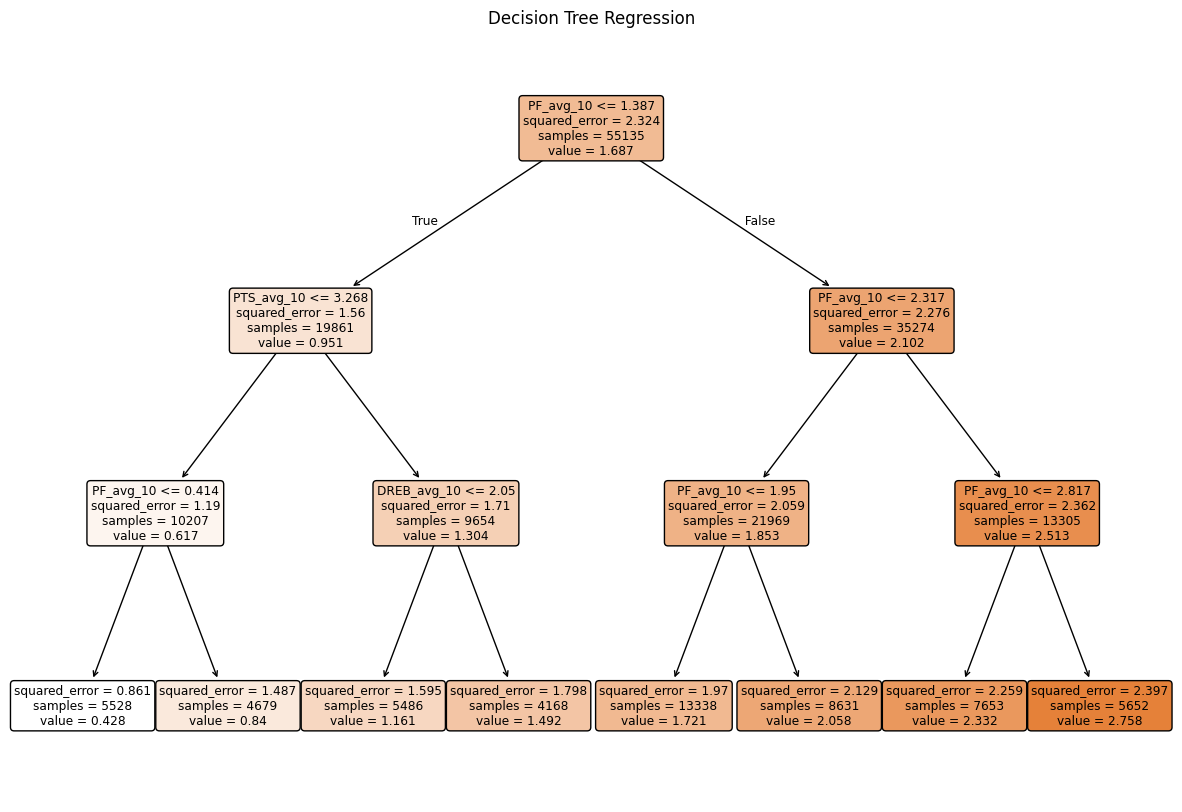

In [213]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and target
X_reg = seasons_2017_2019_df[[col for col in seasons_2017_2019_df.columns if '_avg_10' in col]]
y_reg = seasons_2017_2019_df['PF']

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train decision tree regressor
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train_reg, y_train_reg)

# Evaluate the model
mse_reg = mean_squared_error(y_test_reg, tree_reg.predict(X_test_reg))
r2_reg = r2_score(y_test_reg, tree_reg.predict(X_test_reg))
print(f"Regression Mean Squared Error (MSE): {mse_reg:.2f}")
print(f"Regression R-squared: {r2_reg:.2f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_reg, feature_names=X_reg.columns, filled=True, rounded=True)
plt.title("Decision Tree Regression")
plt.show()
